In [1]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [2]:
from pprint import pprint

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pit_df = pd.read_csv("../Data/Corpus_csv/pitchers_all_career.csv")

In [4]:
pit_df.head()

Id         Name  Active  First year  Last year  \
0  Jay_Aldrich_192  Jay Aldrich   False        1987       1990   
1   A.J._Achter_52  A.J. Achter   False        2014       2016   
2   A.J._Alexy_214   A.J. Alexy    True        2021       2021   
3  Aaron_Ashby_601  Aaron Ashby    True        2021       2022   
4  Abe_Alvarez_329  Abe Alvarez   False        2004       2006   

                                                 Url Country Bat hand  \
0  https://www.baseball-reference.com//players/a/...      us    Right   
1  https://www.baseball-reference.com//players/a/...      us    Right   
2  https://www.baseball-reference.com//players/a/...      us    Right   
3  https://www.baseball-reference.com//players/a/...      us    Right   
4  https://www.baseball-reference.com//players/a/...      us     Left   

  Throw hand            Full Name  HoF HoF type HoF year HoF comittee  \
0      Right   Jay Robert Aldrich    0        -        -            -   
1      Right   Adam Joseph Achter    0        -        -            -   
2      Right      Adam John Alexy    0        -        -            -   
3       Left  Aaron Phillip Ashby    0        -        -            -   
4       Left      Abraham Alvarez    0        -        -            -   

   Player type retirement_age  total_seasons    career_teams career_leagues  \
0            1             29              3  ['MIL', 'BAL']   ['AL', 'NL']   
1            1             27              3  ['MIN', 'LAA']         ['AL']   
2            1             23              1         ['TEX']         ['AL']   
3            1             24              2         ['MIL']         ['NL']   
4            1             23              3         ['BOS']         ['AL']   

  first_position second_position  play_in_mayors  play_in_negro_league  \
0              P               -               1                     0   
1              P               -               1                     0   
2              P               -               1                     0   
3              P               -               1                     0   
4              P               -               1                     0   

   two_way_player  debut_decade  retirament_decade  W_pt  L_pt  W-L%_pt  \
0               0          1980               1990   6.0   5.0    0.545   
1               0          2010               2010   2.0   1.0    0.667   
2               0          2020               2020   3.0   1.0    0.750   
3               0          2020               2020   3.0   5.0    0.375   
4               0          2000               2000   0.0   1.0    0.000   

   ERA_pt  G_pt  GS_pt  GF_pt  CG_pt  SHO_pt  SV_pt  IP_pt   H_pt  R_pt  \
0    4.72  62.0    0.0   21.0    0.0     0.0    2.0  108.2  119.0  62.0   
1    3.92  45.0    0.0   22.0    0.0     0.0    0.0   62.0   69.0  30.0   
2    4.70   5.0    4.0    0.0    0.0     0.0    0.0   23.0   13.0  12.0   
3    3.70  23.0    8.0    5.0    0.0     0.0    2.0   65.2   51.0  35.0   
4   11.32   4.0    1.0    1.0    0.0     0.0    0.0   10.1   19.0  13.0   

   ER_pt  HR_pt  BB_pt  IBB_pt  SO_pt  HBP_pt  BK_pt  WP_pt  BF_pt  ERA+_pt  \
0   57.0   12.0   39.0     9.0   46.0     3.0    2.0    3.0  474.0     90.0   
1   27.0   13.0   21.0     2.0   33.0     1.0    0.0    0.0  267.0    104.0   
2   12.0    4.0   17.0     0.0   17.0     1.0    0.0    0.0   97.0     95.0   
3   27.0    6.0   32.0     0.0   78.0     2.0    0.0    3.0  281.0    113.0   
4   13.0    5.0    7.0     0.0    5.0     0.0    0.0    0.0   53.0     46.0   

   FIP_pt  WHIP_pt  H9_pt  HR9_pt  BB9_pt  SO9_pt  SO/W_pt  RAA_pt  WAA_pt  \
0    4.57    1.454    9.9     1.0     3.2     3.8     1.18    -7.0    -0.7   
1    5.87    1.452   10.0     1.9     3.0     4.8     1.57    -2.0    -0.3   
2    6.30    1.304    5.1     1.6     6.7     6.7     1.00    -1.0    -0.1   
3    3.52    1.264    7.0     0.8     4.4    10.7     2.44    -6.0    -0.6   
4   10.43    2.516   16.5     4.4     6.1     4.4     

In [5]:
pit_df.shape

(10157, 60)

In [17]:
from Preprocessing.data_keys import headers_bio, headers_pit

In [12]:
from Preprocessing.data_frame_procces import filter_dataset, select_features

In [10]:
pit_df['retirement_age'] = (
        pit_df['retirement_age'].replace('desconocido', pit_df['retirement_age'].mode()[0])
    )
pit_df['retirement_age'] = pit_df['retirement_age'].astype('int64')

In [21]:
gt_conditions = {
    "total_seasons":10,
    'G_pt':150,
}
eq_conditions = {
    "HoF type":['-','Player']
}
filter_df = filter_dataset(pit_df, eq_conditions,gt_conditions, None, None)

In [22]:
filter_df.shape

(1418, 60)

In [23]:
for h in headers_pit:
    nan = filter_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{filter_df[h].isna().sum()}")
        #print(f"{h}:{bat_df[h].isna().sum()}")

IBB_pt:True --->128
HBP_pt:True --->1


In [24]:
print(filter_df['HoF'].value_counts())

0    1339
1      79
Name: HoF, dtype: int64


In [27]:
inactives_cond = {"Active":[False]}
inactive_pit_df = filter_dataset(filter_df, inactives_cond, None, None, None) 

In [28]:
inactive_pit_df.shape

(1325, 60)

In [29]:
print(inactive_pit_df['HoF'].value_counts())

0    1246
1      79
Name: HoF, dtype: int64


In [30]:
negro_league_condition = {
    'play_in_negro_league':[1]
}
negro_lg_pit_df = filter_dataset(filter_df, negro_league_condition, None, None, None)

In [31]:
negro_lg_pit_df.shape

(25, 60)

In [32]:
negro_lg_pit_df.describe()

First year    Last year       HoF  Player type  retirement_age  \
count    25.000000    25.000000  25.00000         25.0        25.00000   
mean   1928.120000  1945.520000   0.24000          1.0        38.80000   
std       7.886275     9.142939   0.43589          0.0         5.09902   
min    1920.000000  1931.000000   0.00000          1.0        33.00000   
25%    1922.000000  1939.000000   0.00000          1.0        35.00000   
50%    1926.000000  1945.000000   0.00000          1.0        39.00000   
75%    1931.000000  1948.000000   0.00000          1.0        40.00000   
max    1947.000000  1965.000000   1.00000          1.0        58.00000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count      25.000000       25.000000                  25.0            25.0   
mean       13.800000        0.280000                   1.0             0.4   
std         2.415229        0.458258                   0.0             0.5   
min        11.000000        0.000000                   1.0             0.0   
25%        12.000000        0.000000                   1.0             0.0   
50%        13.000000        0.000000                   1.0             0.0   
75%        14.000000        1.000000                   1.0             1.0   
max        21.000000        1.000000                   1.0             1.0   

       debut_decade  retirament_decade       W_pt        L_pt    W-L%_pt  \
count     25.000000          25.000000   25.00000   25.000000  25.000000   
mean    1924.800000        1939.600000   84.32000   60.680000   0.573040   
std        7.702813           9.780934   29.66721   16.920697   0.091082   
min     1920.000000        1930.000000   40.00000   36.000000   0.360000   
25%     1920.000000        1930.000000   60.00000   52.000000   0.507000   
50%     1920.000000        1940.000000   74.00000   56.000000   0.586000   
75%     1930.000000        1940.000000  110.00000   66.000000   0.642000   
max     1940.000000        1960.000000  153.00000  104.000000   0.729000   

          ERA_pt        G_pt       GS_pt      GF_pt       CG_pt     SHO_pt  \
count  25.000000   25.000000   25.000000   25.00000   25.000000  25.000000   
mean    3.613600  220.760000  145.680000   28.40000   87.960000  10.600000   
std     0.542516   65.625376   47.617154   27.57112   30.552523   7.314369   
min     2.630000  153.000000   59.000000    4.00000   29.000000   2.000000   
25%     3.330000  174.000000  116.000000   14.00000   66.000000   6.000000   
50%     3.710000  205.000000  134.000000   22.00000   81.000000   8.000000   
75%     3.980000  238.000000  158.000000   26.00000  113.000000  15.000000   
max     4.840000  398.000000  305.000000  114.00000  145.000000  31.000000   

           SV_pt        IP_pt         H_pt         R_pt       ER_pt  \
count  25.000000    25.000000    25.000000    25.000000   25.000000   
mean   10.920000  1263.724000  1235.760000   626.640000  498.800000   
std     9.367141   342.686643   314.262136   137.176553  124.682931   
min     2.000000   806.000000   761.000000   394.000000  296.000000   
25%     5.000000   985.200000  1031.000000   560.000000  438.000000   
50%     8.000000  1184.000000  1239.000000   606.000000  477.000000   
75%    12.000000  1499.200000  1381.000000   652.000000  521.000000   
max    44.000000  2251.200000  2188.000000  1007.000000  893.000000   

            HR_pt       BB_pt     IBB_pt        SO_pt     HBP_pt      BK_pt  \
count   25.000000   25.000000  22.000000    25.000000  25.000000  25.000000   
mean    49.120000  374.480000   6.409091   692.200000  28.680000   0.840000   
std     50.996993  123.852103  13.153522   288.676001  11.852285   1.247664   
min     12.000000  184.000000   0.000000   380.000000   9.000000   0.000000   
25%     22.000000  291.000000   0.000000   483.000000  20.000000   0.000000   
50%     36.000000  357.000000   0.000000   625.000000  28.000000   0.000000   
75%     51.000000  402.000000   1.750000   719.000000  36

In [33]:
negro_lg_pit_df['HoF'].value_counts()

0    19
1     6
Name: HoF, dtype: int64

In [34]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
mL_gt_cond = {
    'WAR_pt':15
}


mayors_lg_pit_df = filter_dataset(filter_df, mayor_league_condition, mL_gt_cond, None, None)


In [35]:
mayors_lg_pit_df.shape

(698, 60)

In [38]:
drop_recent_election_cond = {
    'retirament_decade':2009
}
inactive_mayors_lg_pit_df = filter_dataset(inactive_pit_df, mayor_league_condition, mL_gt_cond, drop_recent_election_cond, None)

In [39]:
inactive_mayors_lg_pit_df.shape

(579, 60)

In [40]:
inactive_mayors_lg_pit_df.describe()

First year    Last year         HoF  Player type  retirement_age  \
count   579.000000   579.000000  579.000000        579.0      579.000000   
mean   1949.238342  1963.526770    0.122625          1.0       36.500864   
std      32.134964    32.599232    0.328290          0.0        3.768553   
min    1871.000000  1884.000000    0.000000          1.0       28.000000   
25%    1924.000000  1938.000000    0.000000          1.0       34.000000   
50%    1956.000000  1970.000000    0.000000          1.0       36.000000   
75%    1977.000000  1991.000000    0.000000          1.0       39.000000   
max    1998.000000  2009.000000    1.000000          1.0       58.000000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count     579.000000           579.0            579.000000      579.000000   
mean       14.499136             1.0              0.008636        0.081174   
std         3.350037             0.0              0.092606        0.273339   
min        10.000000             1.0              0.000000        0.000000   
25%        12.000000             1.0              0.000000        0.000000   
50%        14.000000             1.0              0.000000        0.000000   
75%        16.000000             1.0              0.000000        0.000000   
max        27.000000             1.0              1.000000        1.000000   

       debut_decade  retirament_decade        W_pt        L_pt     W-L%_pt  \
count    579.000000         579.000000  579.000000  579.000000  579.000000   
mean    1944.663212        1958.791019  148.834197  125.642487    0.536228   
std       32.090091          32.463813   65.768811   46.436864    0.053799   
min     1870.000000        1880.000000   35.000000   30.000000    0.372000   
25%     1920.000000        1930.000000  104.000000   94.000000    0.502000   
50%     1950.000000        1970.000000  133.000000  117.000000    0.533000   
75%     1970.000000        1990.000000  184.000000  150.000000    0.568000   
max     1990.000000        2000.000000  511.000000  315.000000    0.717000   

           ERA_pt         G_pt       GS_pt       GF_pt       CG_pt  \
count  579.000000   579.000000  579.000000  579.000000  579.000000   
mean     3.494352   469.333333  297.728843  102.333333  120.754750   
std      0.502592   171.723387  145.556089  142.963365  109.904025   
min      1.820000   153.000000    0.000000    0.000000    0.000000   
25%      3.185000   348.500000  223.500000   22.500000   44.000000   
50%      3.540000   424.000000  292.000000   53.000000   89.000000   
75%      3.830000   550.500000  372.000000  103.000000  170.500000   
max      4.990000  1252.000000  815.000000  802.000000  749.000000   

           SHO_pt       SV_pt        IP_pt         H_pt         R_pt  \
count  579.000000  579.000000   579.000000   579.000000   579.000000   
mean    19.476684   33.614853  2406.444560  2341.571675  1103.164076   
std     14.433623   68.336349   963.344149   936.713551   462.416171   
min      0.000000    0.000000   708.200000   479.000000   252.000000   
25%      9.000000    3.500000  1757.650000  1699.500000   805.000000   
50%     17.000000   10.000000  2191.200000  2188.000000  1012.000000   
75%     27.000000   25.000000  2865.550000  2807.500000  1322.500000   
max    110.000000  478.000000  7356.000000  7092.000000  3497.000000   

             ER_pt       HR_pt        BB_pt     IBB_pt        SO_pt  \
count   579.000000  579.000000   579.000000  479.00000   579.000000   
mean    921.162349  159.214162   747.810017   56.02714  1278.063903   
std     341.691763   89.818863   304.037301   29.62558   656.515825   
min     234.000000   10.000000   162.000000    0.00000   378.000000   
25%     692.000000   95.000000   538.000000   36.00000   856.000000   
50%     872.000000  147.000000   706.000000   52.00000  1128.000000   
75%    1124.000000  211.000000   889.500000   74.00000  1531.000000   
max    2147.000000  505.000000  2795.000000  179.00000  5714.000000  

In [41]:
elegible_per_ten_year_cond = {
    "total_seasons":10,
}

inactive_plus_10_season = filter_dataset(inactive_mayors_lg_pit_df, None,elegible_per_ten_year_cond, None, None)


In [42]:
inactive_plus_10_season.shape

(579, 60)

In [45]:
features = ['retirement_age','total_seasons','play_in_mayors','play_in_negro_league','two_way_player'
            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','IBB_pt','SO_pt','HBP_pt','BK_pt','WP_pt',
            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','H9_pt','HR9_pt','BB9_pt','SO9_pt','SO/W_pt',
            'RAA_pt','WAA_pt','WAR_pt','RAR_pt']
target = ['HoF']

print(len(features+target))

40


In [46]:
X = select_features(inactive_plus_10_season, features+target)
X

retirement_age  total_seasons  play_in_mayors  play_in_negro_league  \
53                 39             13               1                     0   
69                 31             10               1                     0   
91                 39             16               1                     0   
99                 44             19               1                     0   
116                31             10               1                     0   
...               ...            ...             ...                   ...   
10013              34             12               1                     0   
10023              40             15               1                     0   
10087              44             22               1                     0   
10127              39             13               1                     0   
10139              40             19               1                     0   

       two_way_player   W_pt   L_pt  W-L%_pt  ERA_pt   G_pt  GS_pt  GF_pt  \
53                  0  142.0   75.0    0.654    3.75  352.0  241.0   68.0   
69                  0  130.0  101.0    0.563    4.42  333.0  261.0   40.0   
91                  0   75.0   72.0    0.510    3.25  447.0  149.0  124.0   
99                  0  194.0  140.0    0.581    2.76  482.0  354.0   90.0   
116                 0   87.0  108.0    0.446    4.25  263.0  254.0    5.0   
...               ...    ...    ...      ...     ...    ...    ...    ...   
10013               0  107.0  109.0    0.495    4.10  312.0  300.0    4.0   
10023               0  132.0  116.0    0.532    4.19  424.0  330.0   34.0   
10087               0  511.0  315.0    0.619    2.63  906.0  815.0   84.0   
10127               0  111.0  109.0    0.505    3.74  304.0  270.0   13.0   
10139               0  186.0  191.0    0.493    3.73  533.0  408.0   83.0   

       CG_pt  SHO_pt  SV_pt   IP_pt    H_pt    R_pt   ER_pt  HR_pt   BB_pt  \
53     109.0    17.0   16.0  1950.1  1849.0   924.0   813.0  103.0   738.0   
69     126.0    14.0    2.0  1963.1  2230.0  1106.0   964.0  129.0   706.0   
91      44.0     9.0   33.0  1375.1  1216.0   562.0   496.0  123.0   479.0   
99     205.0    44.0   16.0  2995.1  2841.0  1133.0   917.0   67.0   430.0   
116     31.0     6.0    0.0  1674.0  1779.0   880.0   791.0  154.0   620.0   
...      ...     ...    ...     ...     ...     ...     ...    ...     ...   
10013    9.0     4.0    1.0  1863.2  1855.0   900.0   848.0  240.0   569.0   
10023   10.0     2.0    0.0  2216.1  2217.0  1096.0  1031.0  309.0   711.0   
10087  749.0    76.0   18.0  7356.0  7092.0  3167.0  2147.0  138.0  1217.0   
10127   79.0    20.0    1.0  1849.0  1978.0   889.0   769.0  149.0   526.0   
10139  185.0    24.0   23.0  3126.1  3580.0  1551.0  1295.0  118.0   914.0   

       IBB_pt   SO_pt  HBP_pt  BK_pt  WP_pt    BF_pt  ERA+_pt  FIP_pt  \
53       41.0  1070.0    38.0    5.0   68.0   8292.0    113.0    3.63   
69       46.0   594.0    36.0    3.0    8.0   8686.0    101.0    4.18   
91       35.0   856.0    47.0    9.0   35.0   5790.0    117.0    3.59   
99        NaN  1036.0    47.0    2.0   26.0  11947.0    118.0    2.70   
116      30.0   888.0    32.0   11.0   53.0   7211.0     99.0    4.25   
...       ...     ...     ...    ...    ...      ...      ...     ...   
10013    21.0  1103.0    65.0    3.0   30.0   7889.0    108.0    4.60   
10023    40.0  1480.0    72.0    6.0   58.0   9475.0    103.0    4.63   
10087     NaN  2803.0   161.0    3.0  156.0  29565.0    138.0    2.84   
10127    28.0   705.0    19.0    4.0   32.0   7798.0    107.0    3.86   
10139    25.0   720.0    41.0   15.0   38.0  13478.0    107.0    3.84   

       WHIP_pt  H9_pt  HR9_pt  BB9_pt  SO9_pt  SO/W_pt  RAA_pt  WAA_pt  \
53       1.326    8.5     0.5     3.4     4.9     1.45   104.0    10.1   
69       1.495   10.2     0.6     3.2     2.7     0.84   -22.0    -1.7   
91       1.232    8.0     0.8     3.1     5.6     1.79    84.0     9.6   
99       1.092    8.5     0.2     1

In [47]:
X.describe()

retirement_age  total_seasons  play_in_mayors  play_in_negro_league  \
count      579.000000     579.000000           579.0            579.000000   
mean        36.500864      14.499136             1.0              0.008636   
std          3.768553       3.350037             0.0              0.092606   
min         28.000000      10.000000             1.0              0.000000   
25%         34.000000      12.000000             1.0              0.000000   
50%         36.000000      14.000000             1.0              0.000000   
75%         39.000000      16.000000             1.0              0.000000   
max         58.000000      27.000000             1.0              1.000000   

       two_way_player        W_pt        L_pt     W-L%_pt      ERA_pt  \
count      579.000000  579.000000  579.000000  579.000000  579.000000   
mean         0.081174  148.834197  125.642487    0.536228    3.494352   
std          0.273339   65.768811   46.436864    0.053799    0.502592   
min          0.000000   35.000000   30.000000    0.372000    1.820000   
25%          0.000000  104.000000   94.000000    0.502000    3.185000   
50%          0.000000  133.000000  117.000000    0.533000    3.540000   
75%          0.000000  184.000000  150.000000    0.568000    3.830000   
max          1.000000  511.000000  315.000000    0.717000    4.990000   

              G_pt       GS_pt       GF_pt       CG_pt      SHO_pt  \
count   579.000000  579.000000  579.000000  579.000000  579.000000   
mean    469.333333  297.728843  102.333333  120.754750   19.476684   
std     171.723387  145.556089  142.963365  109.904025   14.433623   
min     153.000000    0.000000    0.000000    0.000000    0.000000   
25%     348.500000  223.500000   22.500000   44.000000    9.000000   
50%     424.000000  292.000000   53.000000   89.000000   17.000000   
75%     550.500000  372.000000  103.000000  170.500000   27.000000   
max    1252.000000  815.000000  802.000000  749.000000  110.000000   

            SV_pt        IP_pt         H_pt         R_pt        ER_pt  \
count  579.000000   579.000000   579.000000   579.000000   579.000000   
mean    33.614853  2406.444560  2341.571675  1103.164076   921.162349   
std     68.336349   963.344149   936.713551   462.416171   341.691763   
min      0.000000   708.200000   479.000000   252.000000   234.000000   
25%      3.500000  1757.650000  1699.500000   805.000000   692.000000   
50%     10.000000  2191.200000  2188.000000  1012.000000   872.000000   
75%     25.000000  2865.550000  2807.500000  1322.500000  1124.000000   
max    478.000000  7356.000000  7092.000000  3497.000000  2147.000000   

            HR_pt        BB_pt     IBB_pt        SO_pt      HBP_pt  \
count  579.000000   579.000000  479.00000   579.000000  578.000000   
mean   159.214162   747.810017   56.02714  1278.063903   53.333910   
std     89.818863   304.037301   29.62558   656.515825   36.620981   
min     10.000000   162.000000    0.00000   378.000000    2.000000   
25%     95.000000   538.000000   36.00000   856.000000   29.000000   
50%    147.000000   706.000000   52.00000  1128.000000   44.000000   
75%    211.000000   889.500000   74.00000  1531.000000   65.000000   
max    505.000000  2795.000000  179.00000  5714.000000  277.000000   

            BK_pt       WP_pt         BF_pt     ERA+_pt      FIP_pt  \
count  579.000000  579.000000    579.000000  579.000000  579.000000   
mean     7.355786   59.934370  10112.930915  110.606218    3.572867   
std      8.124540   44.424297   3999.034382   11.310360    0.473417   
min      0.000000    1.000000   2168.000000   92.000000    2.020000   
25%      2.000000   32.000000   7487.000000  102.500000    3.265000   
50%      5.000000   50.000000   9192.000000  108.000000    3.630000   
75%      9.000000   72.000000  12070.500000  116.500000    3.870000   
max     90.000000  343.000000  29565.000000  157.000000    5.000000   

          WHIP_pt       H9_pt      HR9_pt      BB9_pt      SO9_pt     SO/W_pt  \
count

In [48]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [49]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

In [50]:
from Models.functions.stats_bar import stats_bar_plot

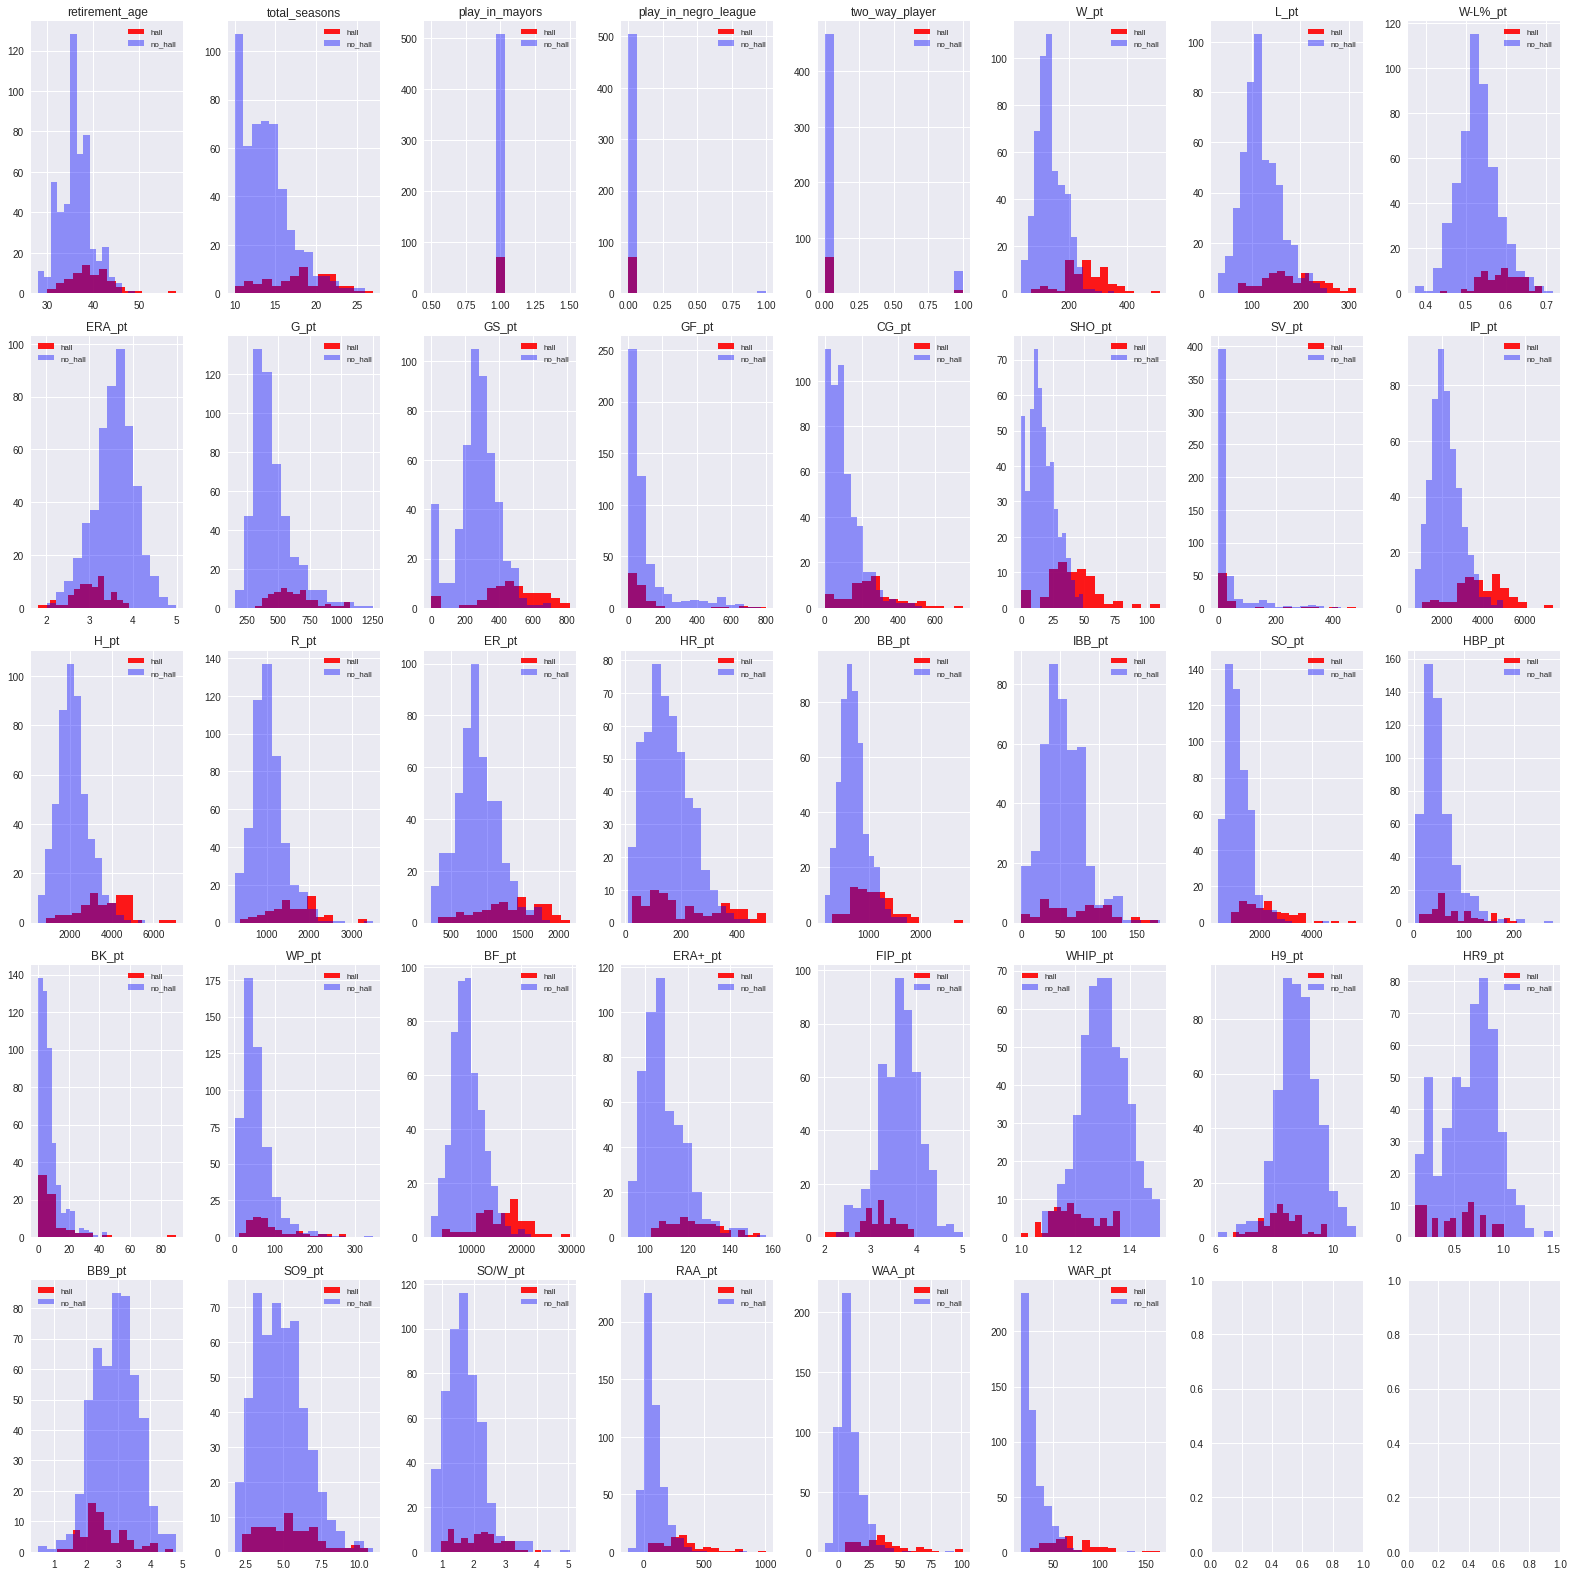

In [53]:
stats_bar_plot(hall, no_hall, features[:-1], 5,8,(22,22))

Las estadisticas defensivas no muestran practicamente diferencia en ambos grupos

In [55]:
of_features = ['retirement_age','total_seasons','play_in_mayors','play_in_negro_league','two_way_player'
            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','IBB_pt','SO_pt','HBP_pt','BK_pt','WP_pt',
            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','H9_pt','HR9_pt','BB9_pt','SO9_pt','SO/W_pt',
            'RAA_pt','WAA_pt','WAR_pt','RAR_pt',]

#of_features = ['play_in_mayors','play_in_negro_league','two_way_player'
#            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
#            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','SO_pt',
#            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','SO/W_pt',
#            'RAA_pt','WAA_pt','WAR_pt','RAR_pt',]

In [67]:
temp=inactive_mayors_lg_pit_df.dropna()
temp.reset_index(inplace=True, drop=True)

X = select_features(temp, of_features)
y = select_features(temp, ['HoF'])

print(y.count)
print(X.count)



<bound method DataFrame.count of      HoF
0      0
1      0
2      0
3      0
4      0
..   ...
474    0
475    0
476    0
477    0
478    0

[479 rows x 1 columns]>
<bound method DataFrame.count of      retirement_age  total_seasons  play_in_mayors  play_in_negro_league  \
0                39             13               1                     0   
1                31             10               1                     0   
2                39             16               1                     0   
3                31             10               1                     0   
4                35             13               1                     0   
..              ...            ...             ...                   ...   
474              36             15               1                     0   
475              34             12               1                     0   
476              40             15               1                     0   
477              39             13       

In [68]:
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)


In [69]:
print(X.index)
y.index

RangeIndex(start=0, stop=479, step=1)


RangeIndex(start=0, stop=479, step=1)

In [70]:
X.describe()

retirement_age  total_seasons  play_in_mayors  play_in_negro_league  \
count      479.000000     479.000000           479.0            479.000000   
mean        36.924843      14.843424             1.0              0.010438   
std          3.685121       3.377645             0.0              0.101740   
min         28.000000      10.000000             1.0              0.000000   
25%         35.000000      12.000000             1.0              0.000000   
50%         37.000000      14.000000             1.0              0.000000   
75%         39.000000      17.000000             1.0              0.000000   
max         58.000000      27.000000             1.0              1.000000   

       two_way_player        W_pt        L_pt     W-L%_pt      ERA_pt  \
count      479.000000  479.000000  479.000000  479.000000  479.000000   
mean         0.018789  140.467641  120.803758    0.532587    3.614029   
std          0.135922   60.043974   44.387499    0.052256    0.409359   
min          0.000000   35.000000   30.000000    0.372000    2.520000   
25%          0.000000  100.500000   91.000000    0.500000    3.330000   
50%          0.000000  126.000000  114.000000    0.531000    3.620000   
75%          0.000000  168.500000  144.000000    0.562500    3.900000   
max          1.000000  373.000000  292.000000    0.717000    4.990000   

              G_pt       GS_pt       GF_pt       CG_pt      SHO_pt  \
count   479.000000  479.000000  479.000000  479.000000  479.000000   
mean    481.830898  288.152401  112.413361   88.889353   17.359081   
std     178.169700  148.795526  154.661123   73.069651   13.131316   
min     153.000000    0.000000    0.000000    0.000000    0.000000   
25%     355.000000  212.000000   19.000000   35.000000    8.000000   
50%     442.000000  285.000000   55.000000   73.000000   15.000000   
75%     570.500000  369.000000  118.500000  124.500000   24.000000   
max    1252.000000  773.000000  802.000000  436.000000   90.000000   

            SV_pt        IP_pt         H_pt         R_pt        ER_pt  \
count  479.000000   479.000000   479.000000   479.000000   479.000000   
mean    38.348643  2283.097286  2226.709812  1036.016701   912.177453   
std     74.129351   896.643948   871.096035   393.024076   341.100845   
min      0.000000   708.200000   479.000000   252.000000   234.000000   
25%      3.000000  1705.600000  1660.500000   778.000000   686.500000   
50%     11.000000  2108.100000  2099.000000   972.000000   874.000000   
75%     29.000000  2706.600000  2668.000000  1238.000000  1106.500000   
max    478.000000  5404.000000  5044.000000  2337.000000  2012.000000   

            HR_pt        BB_pt     IBB_pt        SO_pt      HBP_pt  \
count  479.000000   479.000000  479.00000   479.000000  479.000000   
mean   179.611691   739.133612   56.02714  1294.655532   46.196242   
std     84.514807   304.305924   29.62558   676.988026   29.091241   
min     18.000000   162.000000    0.00000   378.000000    5.000000   
25%    116.000000   530.500000   36.00000   861.500000   27.000000   
50%    164.000000   705.000000   52.00000  1135.000000   40.000000   
75%    226.000000   878.500000   74.00000  1531.000000   57.000000   
max    505.000000  2795.000000  179.00000  5714.000000  190.000000   

            BK_pt       WP_pt         BF_pt     ERA+_pt      FIP_pt  \
count  479.000000  479.000000    479.000000  479.000000  479.000000   
mean     8.373695   53.757829   9626.576200  110.131524    3.678664   
std      8.524651   34.353135   3737.681358   11.220751    0.389231   
min      0.000000    1.000000   2168.000000   92.000000    2.170000   
25%      3.000000   30.000000   7243.000000  102.000000    3.390000   
50%      6.000000   47.000000   8971.000000  107.000000    3.680000   
75%     10.000000   68.000000  11526.500000  116.000000    3.915000   
max     90.000000  277.000000  22677.000000  157.000000    5.000000   

          WHIP_pt       H9_pt      HR9_pt      BB9_pt      SO9_pt     SO/W_pt  \
count

In [71]:
print(X.shape)
y.shape

(479, 39)


(479, 1)

In [72]:
y.value_counts()

HoF
0      427
1       52
dtype: int64

Vemos el porcentaje de pertenencia a la clase minoritaria

In [73]:
round((52/479),3)*100

10.9

El corpus es debalanceado y no es necesaria la separacion por grupos asi que utilizaremos StratifiedKFold para el entrenamiento

Vamos a marcar primero el baseline del problema, utilizando la prediccion negativa para cada jugador

In [74]:
from Models.functions.metrics import show_baseline_score
show_baseline_score(baseline=np.zeros_like(np.ravel(y)), y_val=np.ravel(y))

Accuracy: 0.8914
AUC: 0.5000


Vamos a tener una primera idea de como es el comportamiento inicial de los algoritmos frente al corpus sin procesamiento previo

In [75]:
from Models.functions.models_performance_comparer import performance_comparer

DecisionTree Gini depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

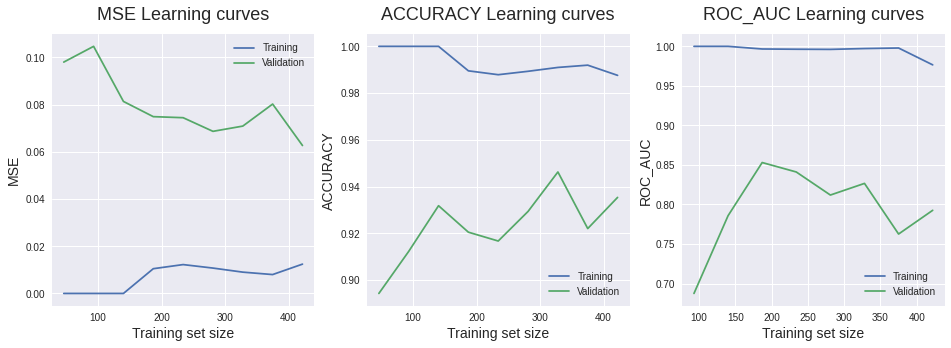

mACC:0.933
mAUC:0.8
<----------------------------------->

DecisionTree Entropy depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

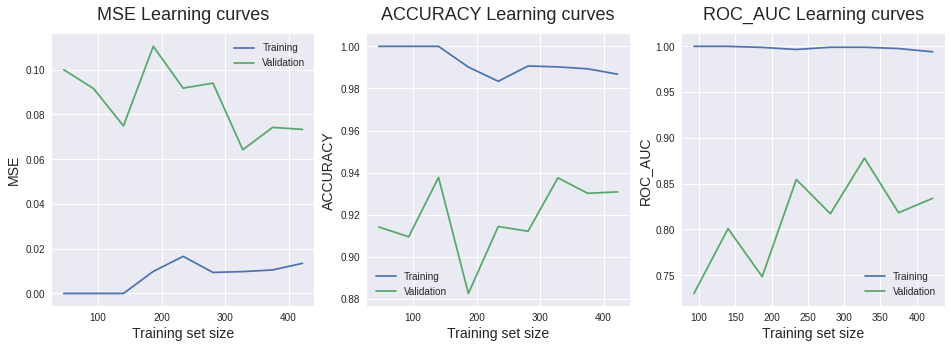

mACC:0.927
mAUC:0.838
<----------------------------------->

DecisionTree Gini depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

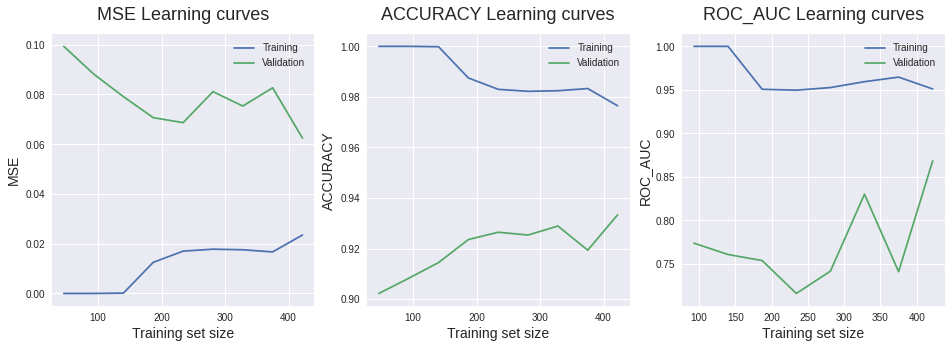

mACC:0.933
mAUC:0.8
<----------------------------------->

DecisionTree Entropy depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

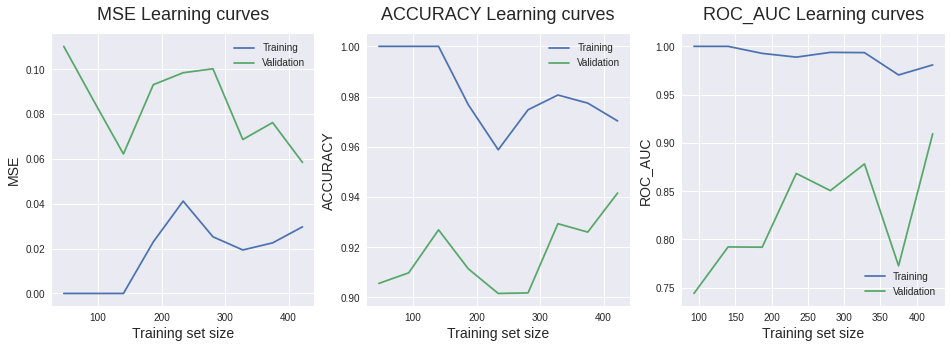

mACC:0.927
mAUC:0.838
<----------------------------------->

SVM kernel=poly


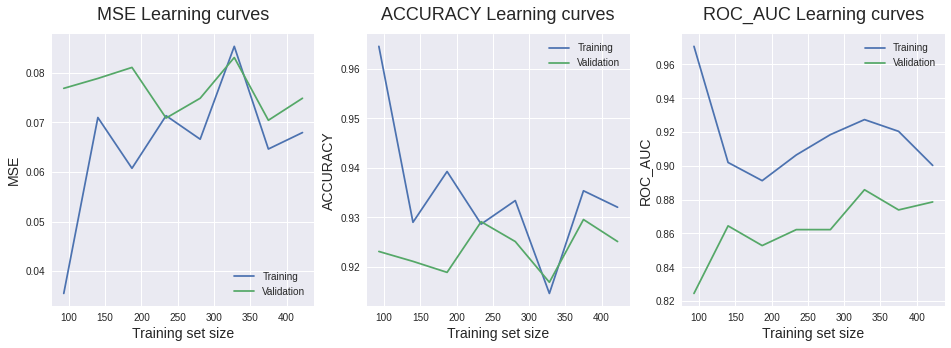

mACC:0.924
mAUC:0.874
<----------------------------------->

SVM kernel=rbf


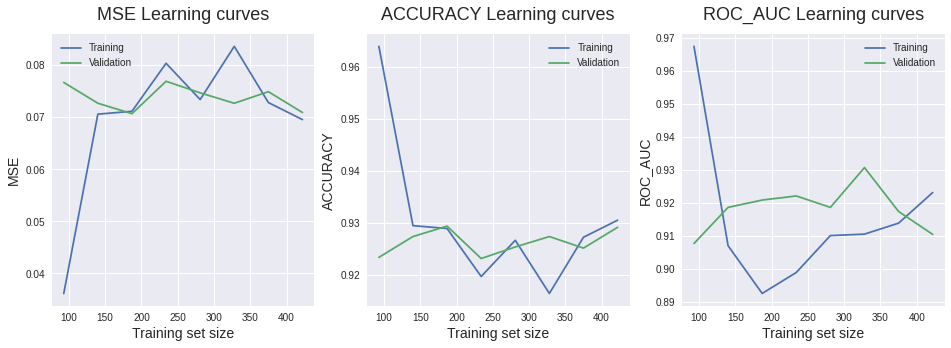

mACC:0.926
mAUC:0.922
<----------------------------------->

Random Forest estimators=10


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

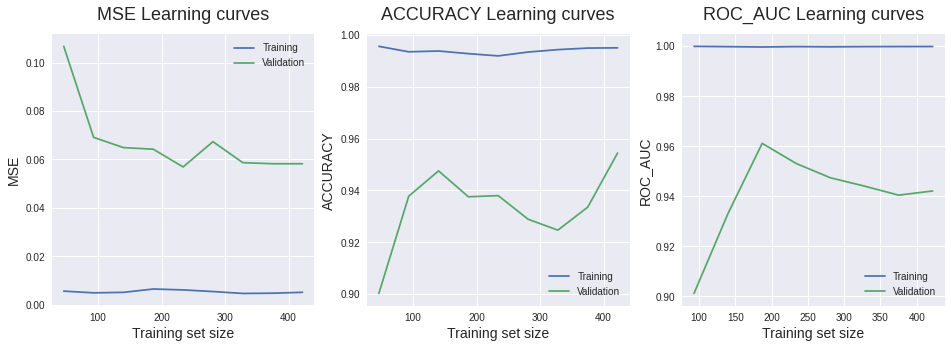

mACC:0.929
mAUC:0.944
<----------------------------------->

Random Forest estimators=5


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

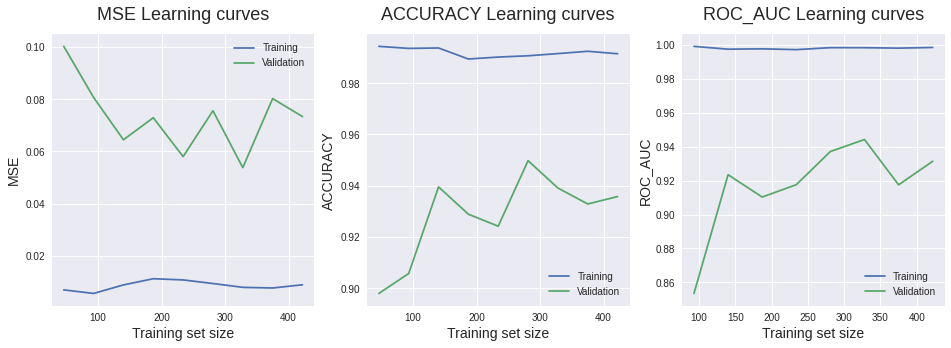

mACC:0.941
mAUC:0.933
<----------------------------------->

Naive Bayes


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_sco

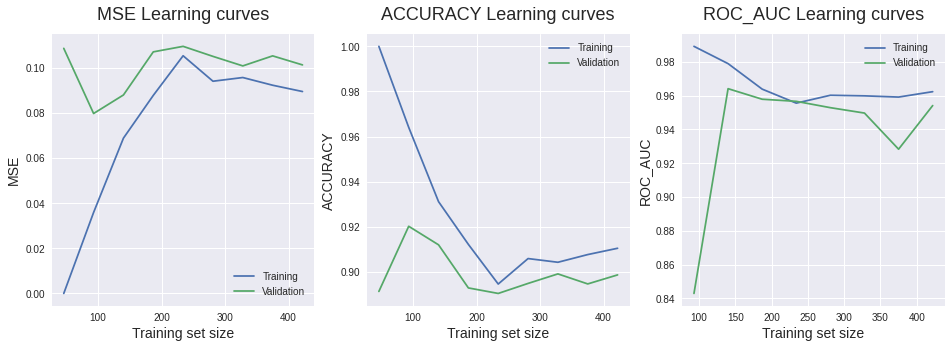

mACC:0.896
mAUC:0.944
<----------------------------------->

3NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

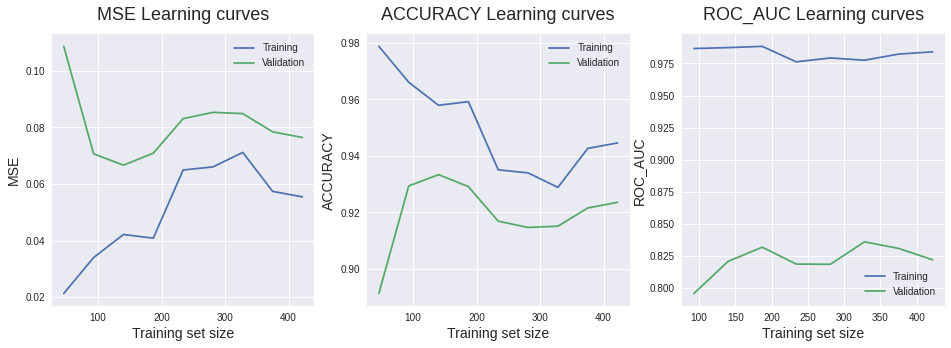

mACC:0.917
mAUC:0.828
<----------------------------------->

5NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

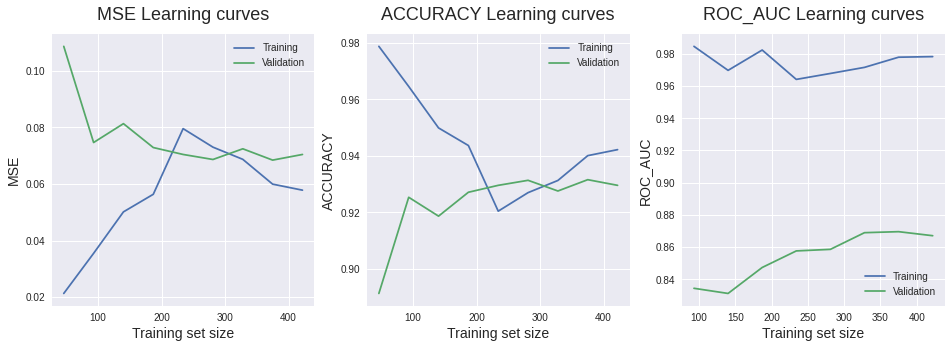

mACC:0.93
mAUC:0.866
<----------------------------------->

10NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

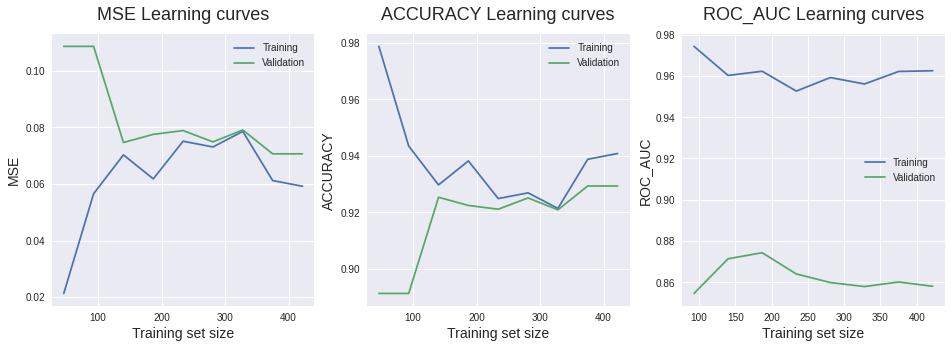

mACC:0.925
mAUC:0.859
<----------------------------------->

LogisticRegression


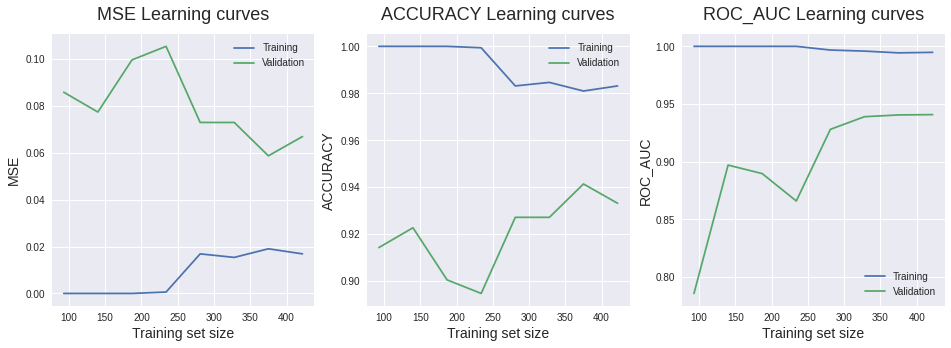

mACC:0.932
mAUC:0.936
<----------------------------------->



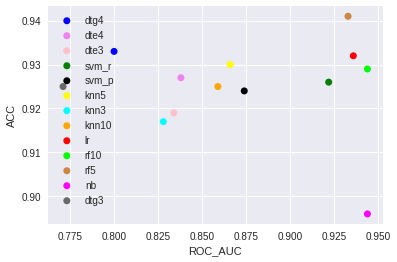

In [76]:
performance_comparer(X, y)

Vamos a ver que nos dicen los modelos acerca de los features

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [78]:
from Models.functions.feature_imp import clasifier_ft_importance_experiments, plot_feature_importance

Las estadísticas avanzadas parecieran ser las que llevan el mayor peso 

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y 

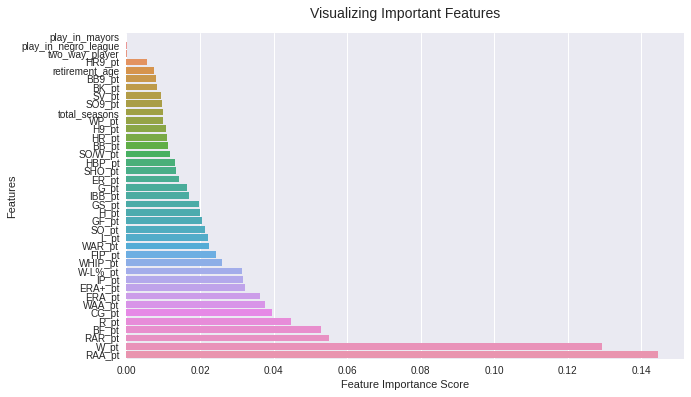

In [79]:
rf10_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf10_clf,X,y).sort_values())

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y 

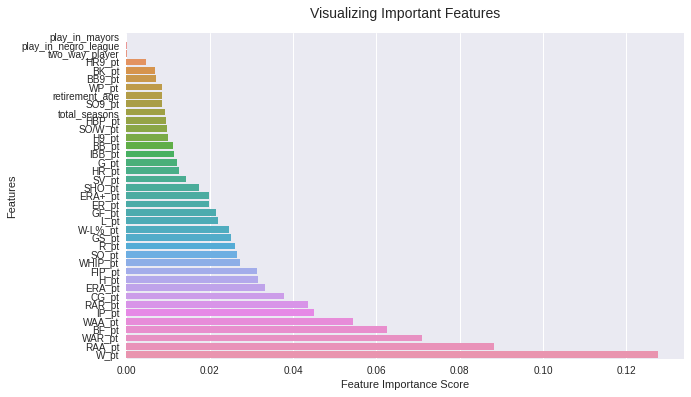

In [80]:
rf50_clf = RandomForestClassifier(n_estimators = 50, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf50_clf,X,y).sort_values())

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y 

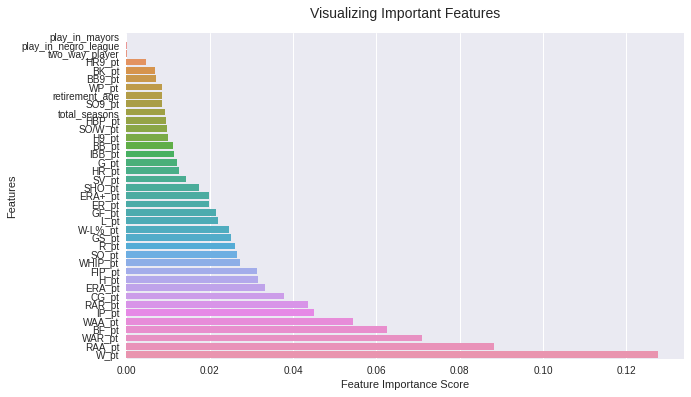

In [81]:
rf100_clf = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf50_clf,X,y).sort_values())

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

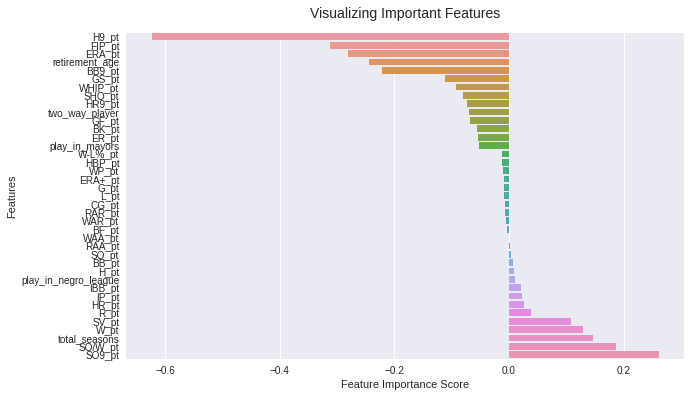

In [82]:
lr_clf = LogisticRegression(solver='liblinear', max_iter=10000)
plot_feature_importance(clasifier_ft_importance_experiments(lr_clf,X,y,True).sort_values())

Vamos a probar con los algoritmos de seleccion de features 

In [83]:
from sklearn.feature_selection import RFE, RFECV

def feature_selection_RFE(clf,X,y,n_features=5):
    rfe = RFE(estimator=clf, n_features_to_select=n_features)
    rfe.fit(X, y)
    for i in range(X.shape[1]):
        if rfe.support_[i]:
    	    print(f'Feature: {X.columns[i]}, Rank: {rfe.ranking_[i]}')

In [84]:
feature_selection_RFE(DecisionTreeClassifier(max_depth=4),X, np.ravel(y), 10)

Feature: retirement_age, Rank: 1
Feature: total_seasons, Rank: 1
Feature: W_pt, Rank: 1
Feature: ERA_pt, Rank: 1
Feature: GF_pt, Rank: 1
Feature: CG_pt, Rank: 1
Feature: BK_pt, Rank: 1
Feature: FIP_pt, Rank: 1
Feature: RAA_pt, Rank: 1
Feature: WAA_pt, Rank: 1


El metodo de RFECV, selecciona automaticamente la cantidad de features

In [85]:
rfecv = RFECV(estimator=DecisionTreeClassifier())
rfecv.fit(X, np.ravel(y))
f = 0
for i in range(X.shape[1]):
    if rfecv.support_[i]:
        f+=1
        print(f'Feature: {X.columns[i]}, Rank: {rfecv.ranking_[i]}')
f

Feature: retirement_age, Rank: 1
Feature: total_seasons, Rank: 1
Feature: W_pt, Rank: 1
Feature: ERA_pt, Rank: 1
Feature: GF_pt, Rank: 1
Feature: BF_pt, Rank: 1
Feature: WAA_pt, Rank: 1


7

In [86]:
from numpy import mean
def automatic_feature_selection(estimators, X, y, n_repetition):
    features_selected  = {}
    count = 0
    for est in estimators:
        rfecv = RFECV(estimator=est)
        for r in range(n_repetition):
            count+=1
            rfecv.fit(X, np.ravel(y))
            for i in range(X.shape[1]):
                if rfecv.support_[i]:
                    feat = X.columns[i]
                    rank = rfecv.ranking_[i]
                    if features_selected.get(feat) == None:
                        features_selected[feat] = [1,rank]
                    else:
                        features_selected[feat][0]+=1
                        features_selected[feat][1]+=rank
    s_features = []
    for feat in features_selected.keys():
        n_selection = features_selected[feat][0]
        m_rank = features_selected[feat][1]/n_selection
        m_selection = (features_selected[feat][0]/count)*100
        s_features.append((feat,m_selection,m_rank))
    s_features.sort(key=lambda x: x[1], reverse=True)
    print(f"Total selections:{count}")
    return s_features
        

In [87]:
estimators = [DecisionTreeClassifier(max_depth=4)]
automatic_feature_selection(estimators, X, y, 35)

Total selections:35


[('W_pt', 100.0, 1.0),
 ('WAA_pt', 100.0, 1.0),
 ('ERA_pt', 60.0, 1.0),
 ('retirement_age', 51.42857142857142, 1.0),
 ('GF_pt', 37.142857142857146, 1.0),
 ('total_seasons', 34.285714285714285, 1.0),
 ('W-L%_pt', 34.285714285714285, 1.0),
 ('CG_pt', 34.285714285714285, 1.0),
 ('BF_pt', 34.285714285714285, 1.0),
 ('ERA+_pt', 34.285714285714285, 1.0),
 ('FIP_pt', 34.285714285714285, 1.0),
 ('SO/W_pt', 34.285714285714285, 1.0),
 ('RAA_pt', 34.285714285714285, 1.0),
 ('L_pt', 31.428571428571427, 1.0),
 ('WP_pt', 31.428571428571427, 1.0),
 ('two_way_player', 28.57142857142857, 1.0),
 ('play_in_negro_league', 25.71428571428571, 1.0),
 ('WHIP_pt', 25.71428571428571, 1.0),
 ('BK_pt', 22.857142857142858, 1.0),
 ('H9_pt', 22.857142857142858, 1.0),
 ('play_in_mayors', 20.0, 1.0),
 ('HR9_pt', 17.142857142857142, 1.0),
 ('BB9_pt', 17.142857142857142, 1.0),
 ('G_pt', 14.285714285714285, 1.0),
 ('GS_pt', 14.285714285714285, 1.0),
 ('SO9_pt', 14.285714285714285, 1.0),
 ('HBP_pt', 11.428571428571429, 1.

In [88]:
estimators = [LogisticRegression(max_iter=10000, solver="liblinear")]
automatic_feature_selection(estimators, X, y, 35)

Total selections:35


[('play_in_mayors', 100.0, 1.0),
 ('play_in_negro_league', 100.0, 1.0),
 ('two_way_player', 100.0, 1.0),
 ('W_pt', 100.0, 1.0),
 ('ERA_pt', 100.0, 1.0),
 ('GS_pt', 100.0, 1.0),
 ('GF_pt', 100.0, 1.0),
 ('SV_pt', 100.0, 1.0),
 ('IBB_pt', 100.0, 1.0),
 ('BK_pt', 100.0, 1.0),
 ('FIP_pt', 100.0, 1.0),
 ('WHIP_pt', 100.0, 1.0),
 ('H9_pt', 100.0, 1.0),
 ('HR9_pt', 100.0, 1.0),
 ('BB9_pt', 100.0, 1.0),
 ('SO9_pt', 100.0, 1.0),
 ('SO/W_pt', 100.0, 1.0),
 ('WAA_pt', 100.0, 1.0),
 ('WAR_pt', 100.0, 1.0)]

In [89]:
estimators = [DecisionTreeClassifier(max_depth=4), LogisticRegression(max_iter=10000, solver="liblinear")]
automatic_feature_selection(estimators, X, y, 35)

Total selections:70


[('W_pt', 100.0, 1.0),
 ('WAA_pt', 100.0, 1.0),
 ('ERA_pt', 78.57142857142857, 1.0),
 ('FIP_pt', 61.42857142857143, 1.0),
 ('GF_pt', 60.0, 1.0),
 ('SO/W_pt', 60.0, 1.0),
 ('WHIP_pt', 58.57142857142858, 1.0),
 ('H9_pt', 55.714285714285715, 1.0),
 ('play_in_mayors', 55.714285714285715, 1.0),
 ('play_in_negro_league', 55.714285714285715, 1.0),
 ('two_way_player', 55.714285714285715, 1.0),
 ('HR9_pt', 54.285714285714285, 1.0),
 ('BB9_pt', 54.285714285714285, 1.0),
 ('SO9_pt', 54.285714285714285, 1.0),
 ('GS_pt', 52.85714285714286, 1.0),
 ('WAR_pt', 52.85714285714286, 1.0),
 ('SV_pt', 51.42857142857142, 1.0),
 ('IBB_pt', 51.42857142857142, 1.0),
 ('BK_pt', 51.42857142857142, 1.0),
 ('retirement_age', 25.71428571428571, 1.0),
 ('total_seasons', 10.0, 1.0),
 ('CG_pt', 10.0, 1.0),
 ('BF_pt', 10.0, 1.0),
 ('ERA+_pt', 10.0, 1.0),
 ('RAA_pt', 10.0, 1.0),
 ('L_pt', 8.571428571428571, 1.0),
 ('W-L%_pt', 8.571428571428571, 1.0),
 ('WP_pt', 8.571428571428571, 1.0),
 ('G_pt', 4.285714285714286, 1.0),


Veamos la correlacion de las variables respecto al Target

In [90]:
df = select_features(inactive_plus_10_season, of_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF                     1.000000
WAR_pt                  0.661079
RAR_pt                  0.631341
W_pt                    0.618664
WAA_pt                  0.614996
RAA_pt                  0.599953
IP_pt                   0.567150
BF_pt                   0.545743
SO_pt                   0.544631
SHO_pt                  0.537152
H_pt                    0.491589
CG_pt                   0.455222
GS_pt                   0.447627
L_pt                    0.441627
ERA+_pt                 0.419334
R_pt                    0.415894
ER_pt                   0.415128
BB_pt                   0.407694
total_seasons           0.380007
WHIP_pt                 0.362437
W-L%_pt                 0.354198
ERA_pt                  0.353359
G_pt                    0.333601
FIP_pt                  0.328097
retirement_age          0.291486
WP_pt                   0.287518
HBP_pt                  0.271576
H9_pt                   0.253185
SO/W_pt                 0.240554
HR_pt                   0.224827
IBB_pt    

In [91]:
m_corr = df.corr()

In [92]:
m_corr

retirement_age  total_seasons  play_in_mayors  \
retirement_age              1.000000       0.756907             NaN   
total_seasons               0.756907       1.000000             NaN   
play_in_mayors                   NaN            NaN             NaN   
play_in_negro_league        0.141266       0.002812             NaN   
two_way_player             -0.150389      -0.119899             NaN   
W_pt                        0.304065       0.516310             NaN   
L_pt                        0.288915       0.553738             NaN   
W-L%_pt                     0.099004       0.051138             NaN   
ERA_pt                     -0.047885      -0.041583             NaN   
G_pt                        0.573927       0.704452             NaN   
GS_pt                       0.193092       0.446870             NaN   
GF_pt                       0.285596       0.218391             NaN   
CG_pt                       0.008280       0.108651             NaN   
SHO_pt                      0.146718       0.311371             NaN   
SV_pt                       0.230475       0.179739             NaN   
IP_pt                       0.291895       0.534909             NaN   
H_pt                        0.272371       0.501640             NaN   
R_pt                        0.188184       0.417811             NaN   
ER_pt                       0.304267       0.561419             NaN   
HR_pt                       0.295421       0.511258             NaN   
BB_pt                       0.268965       0.518316             NaN   
IBB_pt                      0.270192       0.413624             NaN   
SO_pt                       0.331466       0.595593             NaN   
HBP_pt                      0.113590       0.264652             NaN   
BK_pt                       0.233362       0.359095             NaN   
WP_pt                       0.047579       0.263486             NaN   
BF_pt                       0.280902       0.531073             NaN   
ERA+_pt                     0.247365       0.153367             NaN   
FIP_pt                     -0.049700      -0.070219             NaN   
WHIP_pt                    -0.083271      -0.109953             NaN   
H9_pt                      -0.068738      -0.121995             NaN   
HR9_pt                      0.045806       0.107367             NaN   
BB9_pt                     -0.026757      -0.004225             NaN   
SO9_pt                      0.107587       0.211396             NaN   
SO/W_pt                     0.108357       0.189451             NaN   
RAA_pt                      0.258750       0.332123             NaN   
WAA_pt                      0.275850       0.358718             NaN   
WAR_pt                      0.329978       0.486311             NaN   
RAR_pt                      0.308149       0.461824             NaN   
HoF                         0.291486       0.380007             NaN   

                      play_in_negro_league  two_way_player      W_pt  \
retirement_age                    0.141266       -0.150389  0.304065   
total_seasons                     0.002812       -0.119899  0.516310   
play_in_mayors                         NaN             NaN       NaN   
play_in_negro_league              1.000000       -0.027741 -0.067656   
two_way_player                   -0.027741        1.000000  0.170419   
W_pt                             -0.067656        0.170419  1.000000   
L_pt                             -0.099861        0.141184  0.851336   
W-L%_pt                           0.055514        0.115802  0.476493   
ERA_pt                           -0.010102       -0.171206 -0.309586   
G_pt                             -0.100272       -0.129030  0.281019   
GS_pt                            -0.066441        0.087089  0.888912   
GF_pt                            -0.038376       -0.120897 -0.321031   
CG_pt                            -0.022570        0.444002  0.774645   
SHO_pt                           -0.025089        0.094106  0.817527   
SV_pt                         

<AxesSubplot:>

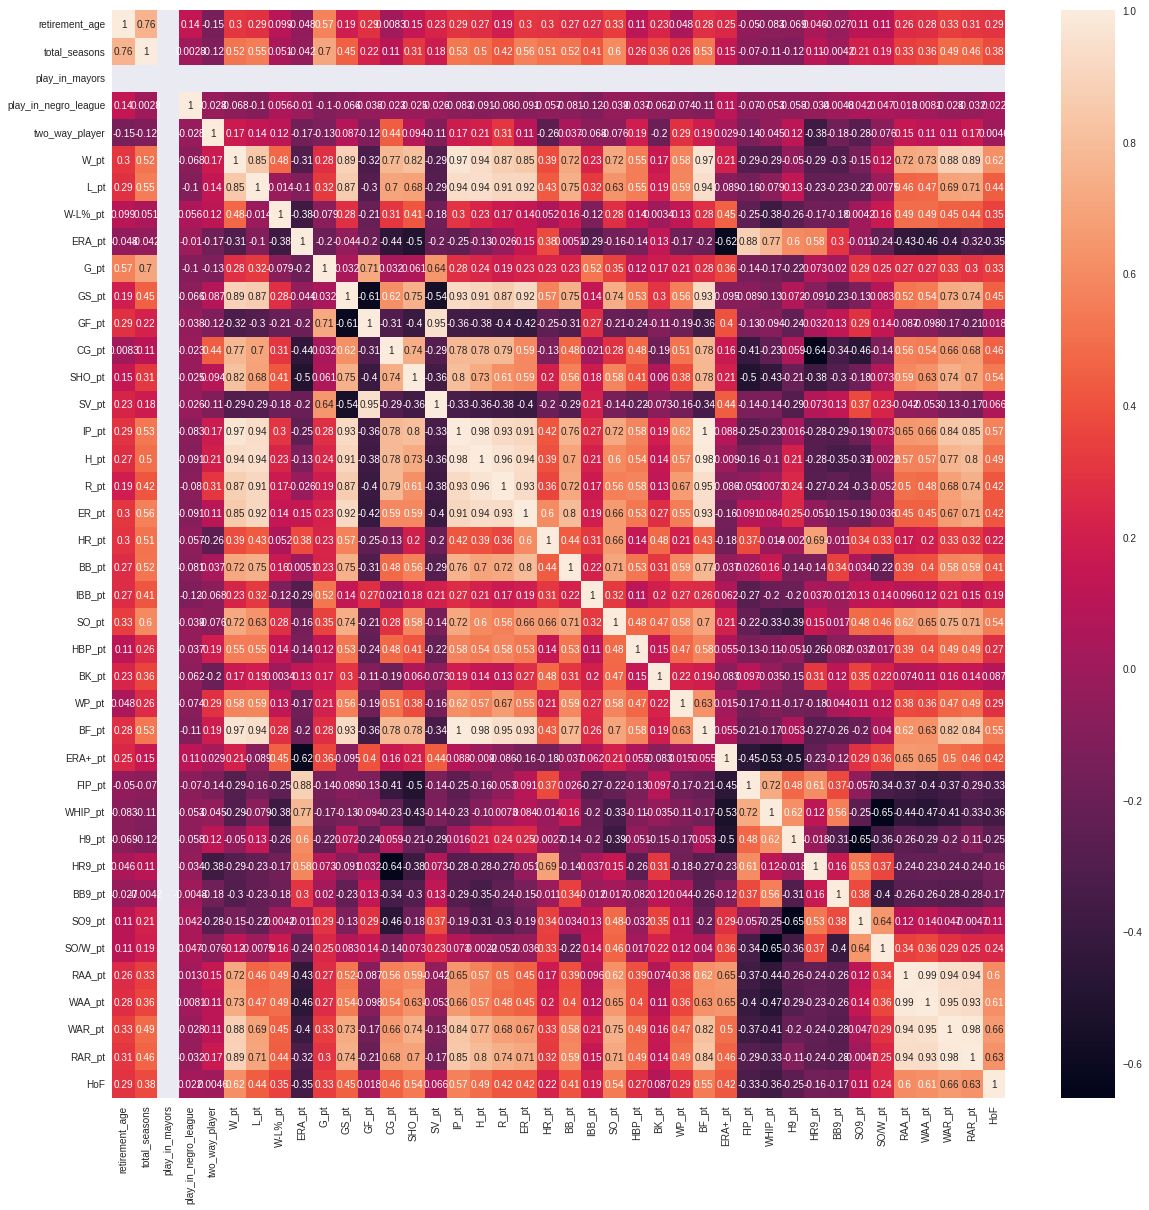

In [93]:
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,20
sns.heatmap(m_corr, annot=True)

Pongamos 80% como limite

In [94]:
feat_more_corr = df_corr[df_corr > 0.79].index.to_list()[1:]
feat_more_corr

[]

In [95]:
#Probemos con 60%

feat_more_corr = df_corr[df_corr > 0.6].index.to_list()[1:]
feat_more_corr

['WAR_pt', 'RAR_pt', 'W_pt', 'WAA_pt']

In [96]:
#Probemos con 50%

feat_more_corr = df_corr[df_corr > 0.5].index.to_list()[1:]
print(len(feat_more_corr))
feat_more_corr

9


['WAR_pt',
 'RAR_pt',
 'W_pt',
 'WAA_pt',
 'RAA_pt',
 'IP_pt',
 'BF_pt',
 'SO_pt',
 'SHO_pt']

In [97]:
#Probemos con 30%

feat_more_corr = df_corr[df_corr > 0.3].index.to_list()[1:]
print(len(feat_more_corr))
feat_more_corr

23


['WAR_pt',
 'RAR_pt',
 'W_pt',
 'WAA_pt',
 'RAA_pt',
 'IP_pt',
 'BF_pt',
 'SO_pt',
 'SHO_pt',
 'H_pt',
 'CG_pt',
 'GS_pt',
 'L_pt',
 'ERA+_pt',
 'R_pt',
 'ER_pt',
 'BB_pt',
 'total_seasons',
 'WHIP_pt',
 'W-L%_pt',
 'ERA_pt',
 'G_pt',
 'FIP_pt']

Vamos a quitarnos aquellos features con alta correlacion, la mayoria de ellos estadisticas calculadas a partir de otras

In [100]:
reduced_features = ['total_seasons','WAR_pt', 'WHIP_pt', 'ERA_pt', 'BB_pt','ER_pt','G_pt','W-L%_pt','R_pt','SHO_pt' ]

In [101]:
X_r = select_features(X, reduced_features)
X_r.reset_index(drop=True, inplace=True)

In [102]:
df = select_features(inactive_plus_10_season, reduced_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF              1.000000
WAR_pt           0.661079
SHO_pt           0.537152
R_pt             0.415894
ER_pt            0.415128
BB_pt            0.407694
total_seasons    0.380007
WHIP_pt          0.362437
W-L%_pt          0.354198
ERA_pt           0.353359
G_pt             0.333601
Name: HoF, dtype: float64

In [103]:
m_corr = df.corr()

<AxesSubplot:>

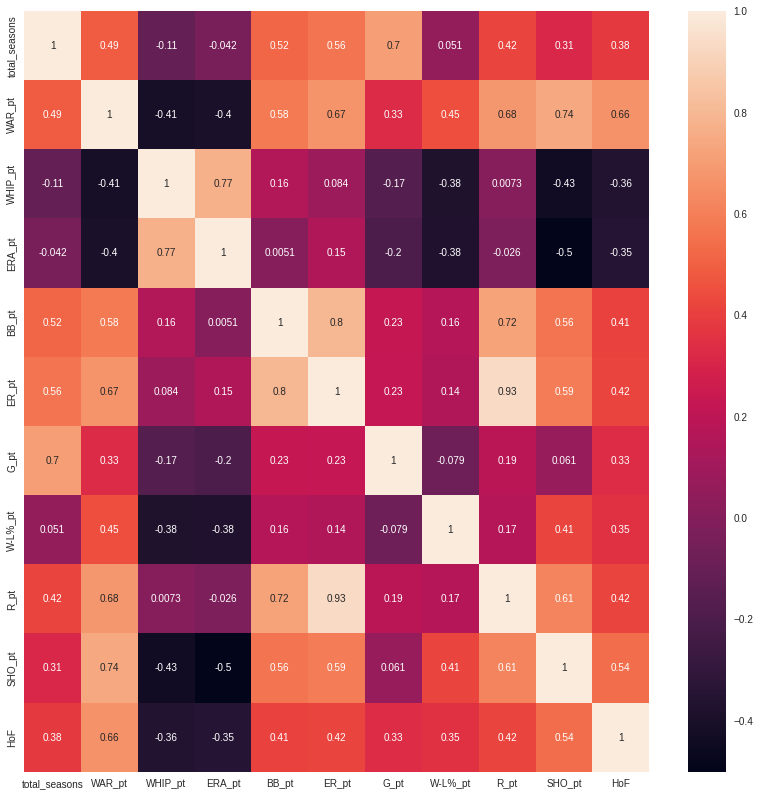

In [104]:
rcParams['figure.figsize'] = 14,14
sns.heatmap(m_corr, annot=True)

Probamos nuevamente los modelos

DecisionTree Gini depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

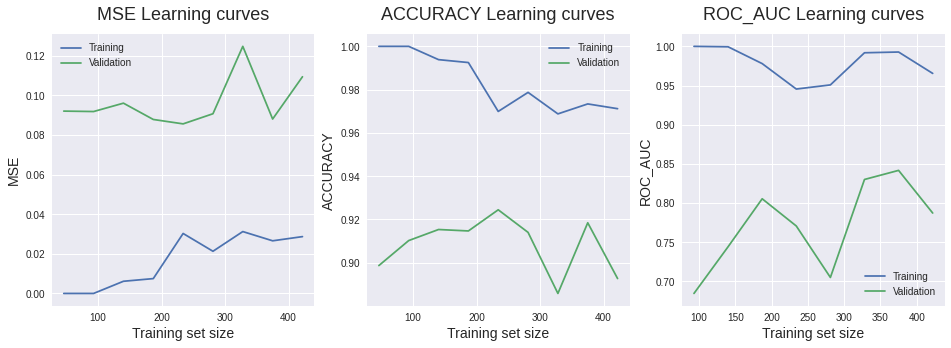

mACC:0.906
mAUC:0.792
<----------------------------------->

DecisionTree Entropy depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

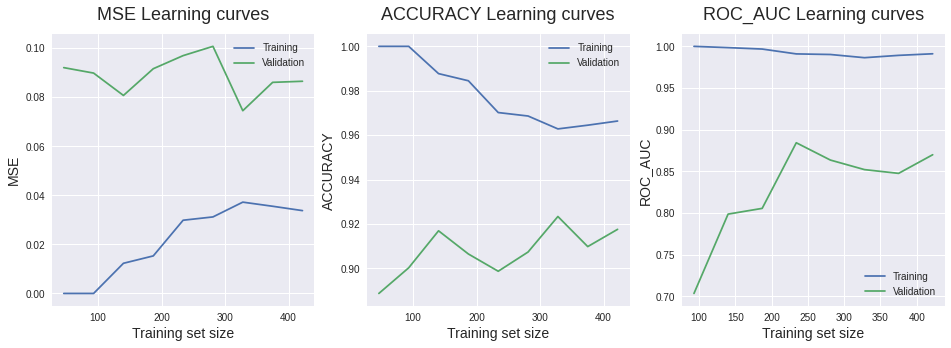

mACC:0.913
mAUC:0.854
<----------------------------------->

DecisionTree Gini depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

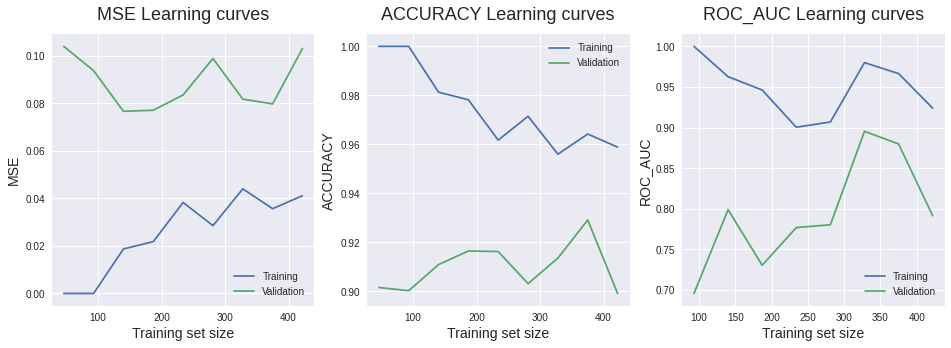

mACC:0.906
mAUC:0.792
<----------------------------------->

DecisionTree Entropy depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

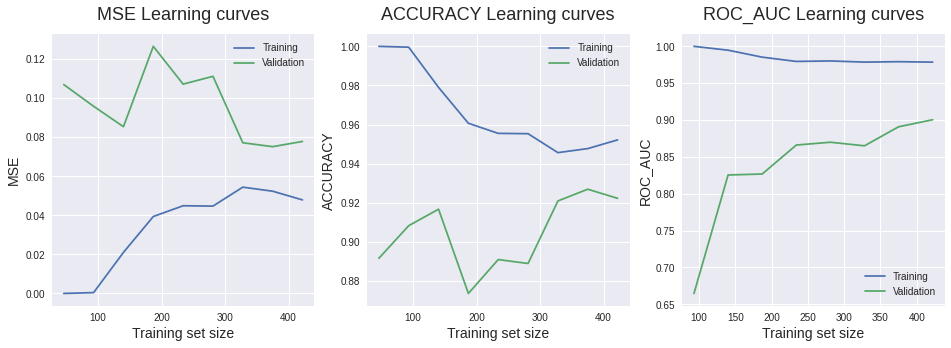

mACC:0.913
mAUC:0.854
<----------------------------------->

SVM kernel=poly


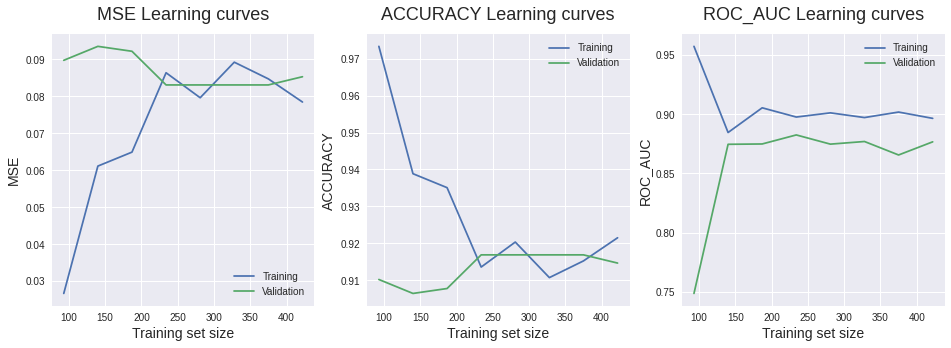

mACC:0.917
mAUC:0.872
<----------------------------------->

SVM kernel=rbf


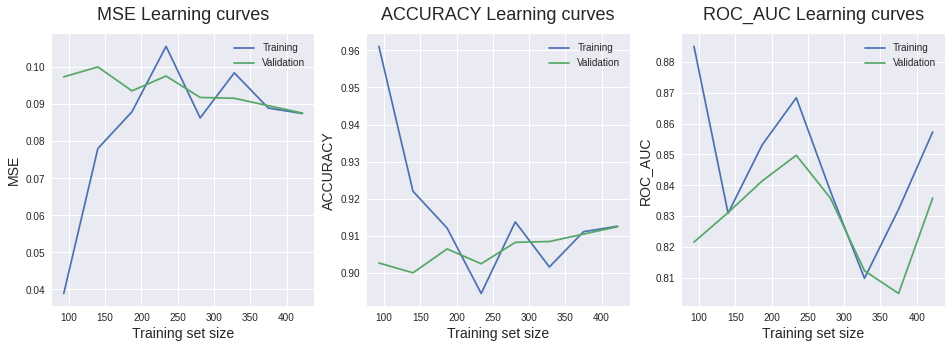

mACC:0.909
mAUC:0.818
<----------------------------------->

Random Forest estimators=10


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

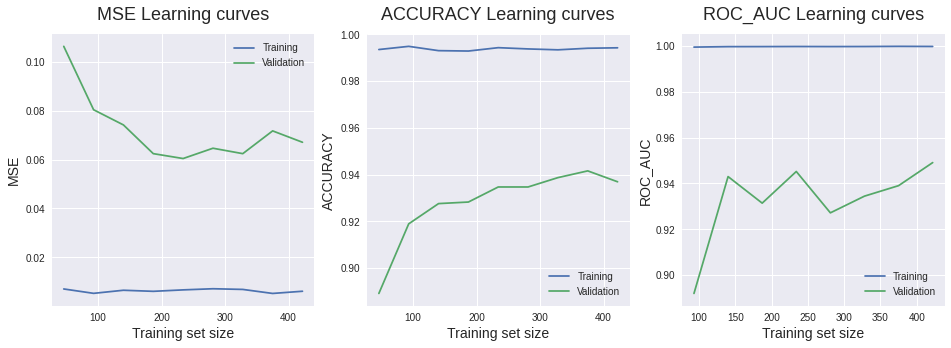

mACC:0.938
mAUC:0.934
<----------------------------------->

Random Forest estimators=5


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

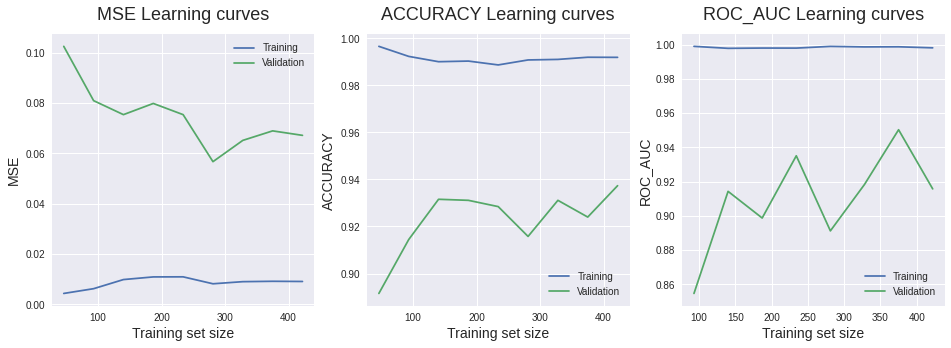

mACC:0.924
mAUC:0.92
<----------------------------------->

Naive Bayes


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_sco

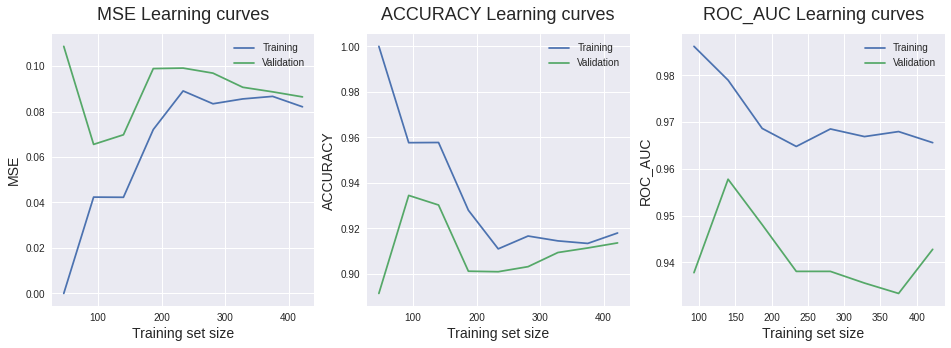

mACC:0.908
mAUC:0.936
<----------------------------------->

3NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

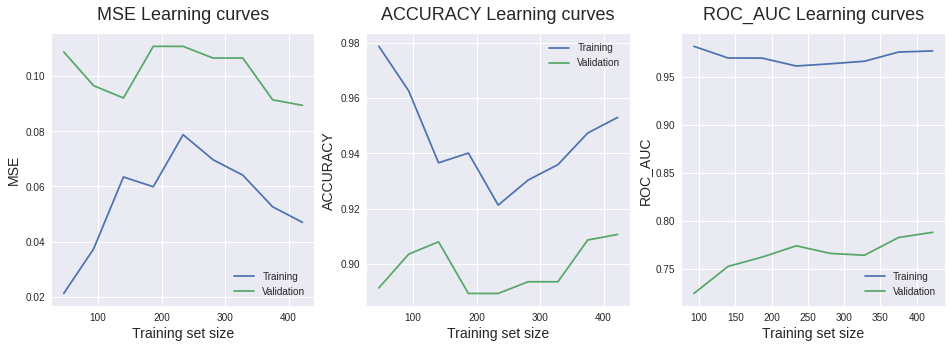

mACC:0.899
mAUC:0.771
<----------------------------------->

5NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

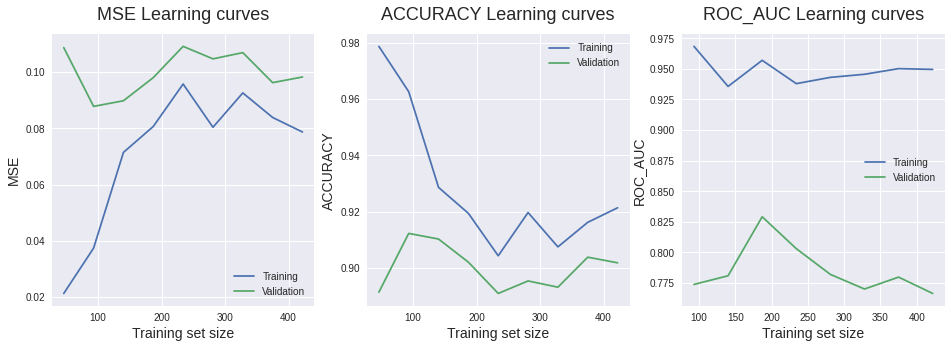

mACC:0.897
mAUC:0.777
<----------------------------------->

10NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

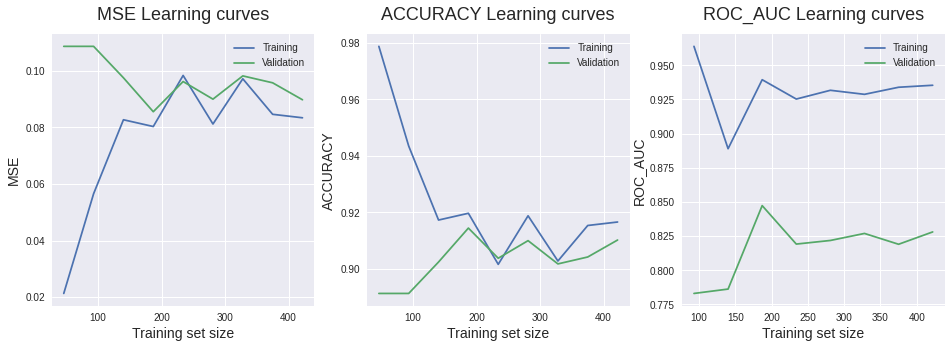

mACC:0.905
mAUC:0.823
<----------------------------------->

LogisticRegression


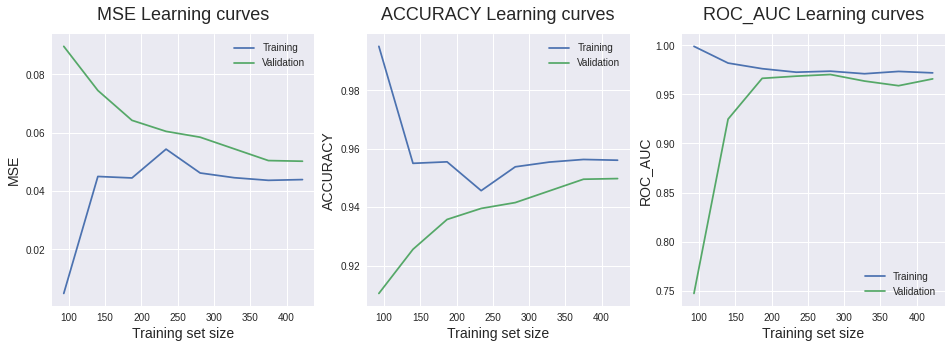

mACC:0.946
mAUC:0.964
<----------------------------------->



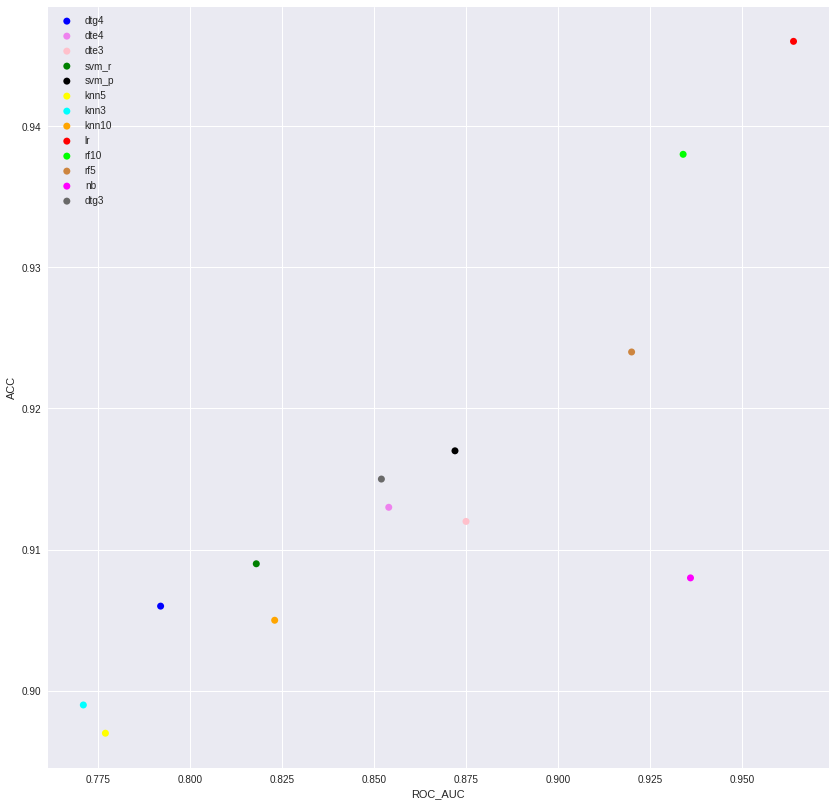

In [105]:
performance_comparer(X_r, y)

Vamos a standarizar los datos

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
sc = StandardScaler()
X_t = sc.fit_transform(X_r)

DecisionTree Gini depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

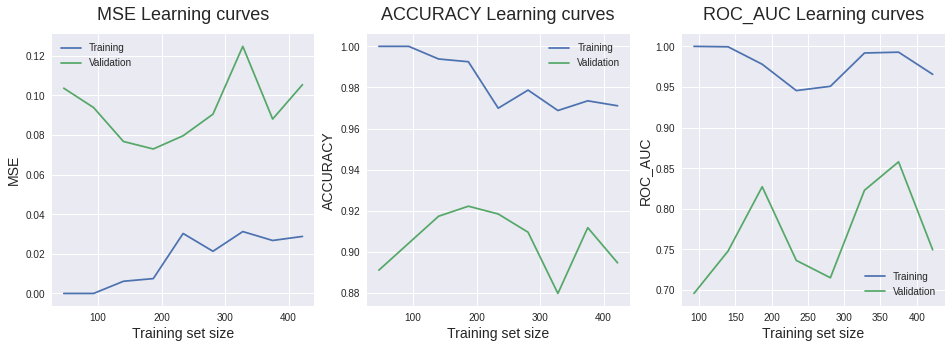

mACC:0.9
mAUC:0.799
<----------------------------------->

DecisionTree Entropy depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

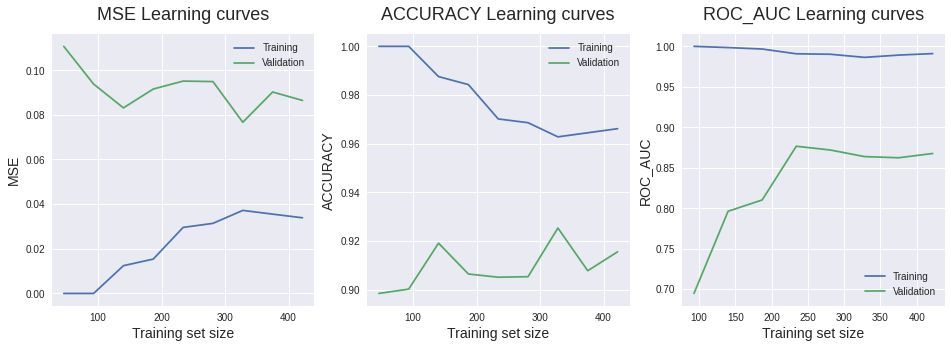

mACC:0.913
mAUC:0.866
<----------------------------------->

DecisionTree Gini depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

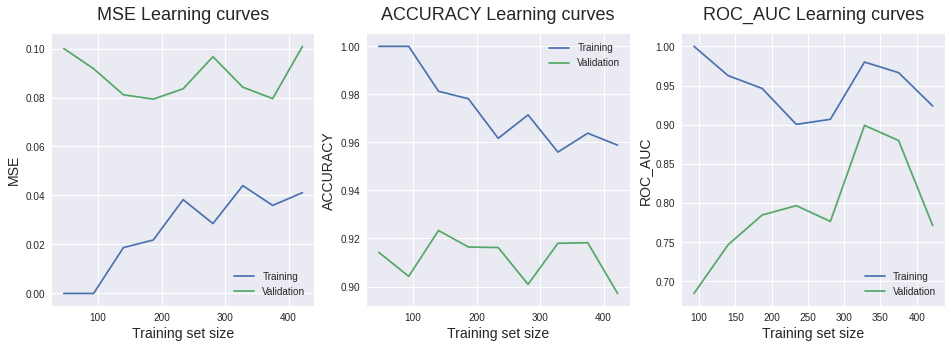

mACC:0.9
mAUC:0.799
<----------------------------------->

DecisionTree Entropy depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

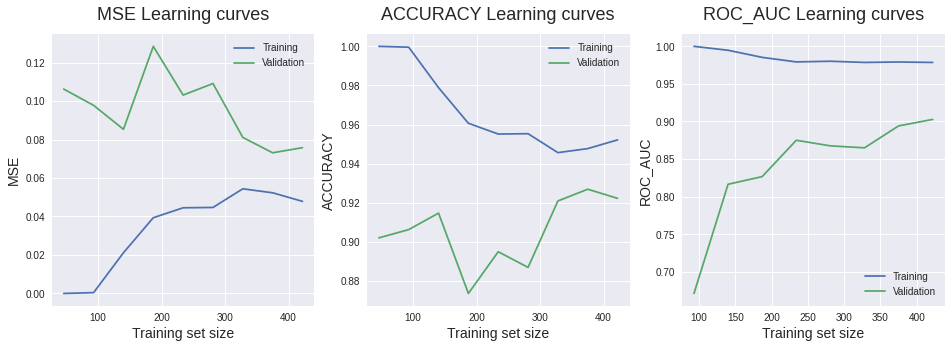

mACC:0.913
mAUC:0.866
<----------------------------------->

SVM kernel=poly


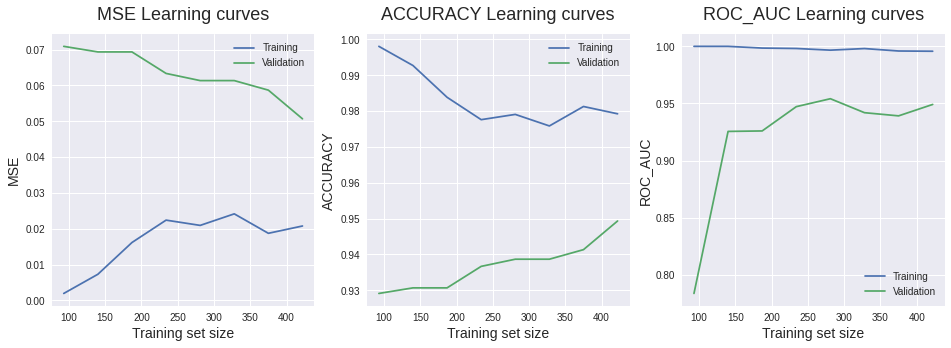

mACC:0.94
mAUC:0.945
<----------------------------------->

SVM kernel=rbf


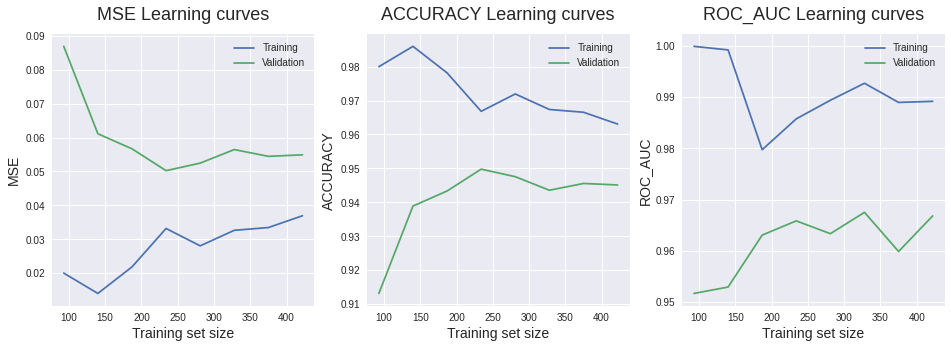

mACC:0.946
mAUC:0.964
<----------------------------------->

Random Forest estimators=10


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

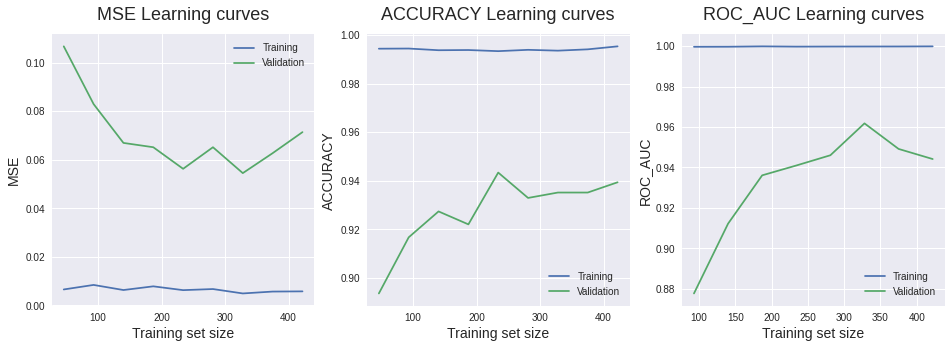

mACC:0.934
mAUC:0.952
<----------------------------------->

Random Forest estimators=5


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

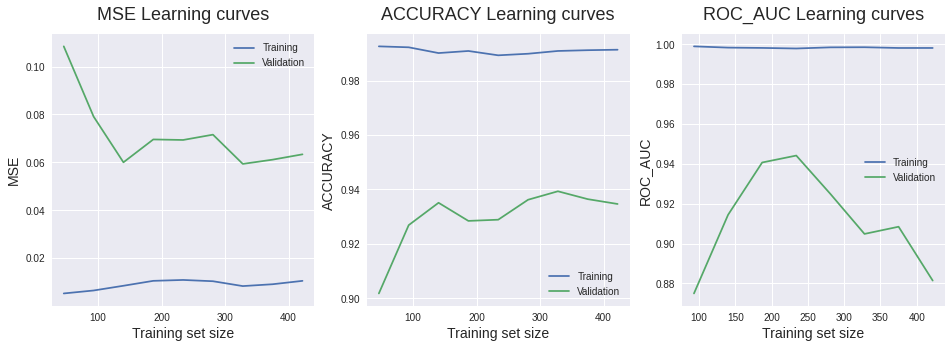

mACC:0.937
mAUC:0.913
<----------------------------------->

Naive Bayes


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_sco

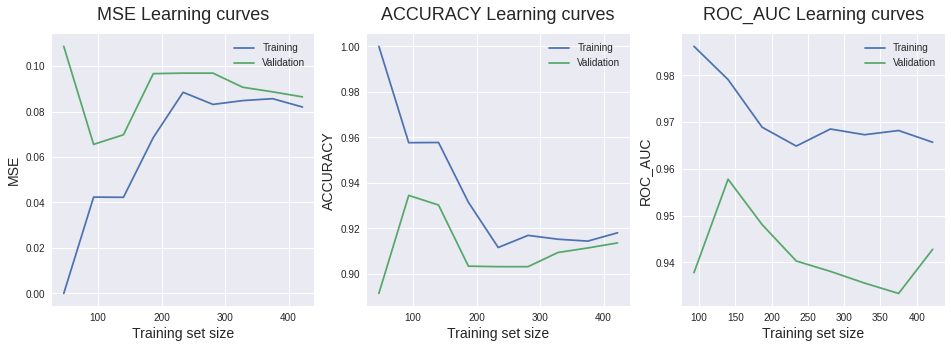

mACC:0.908
mAUC:0.936
<----------------------------------->

3NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

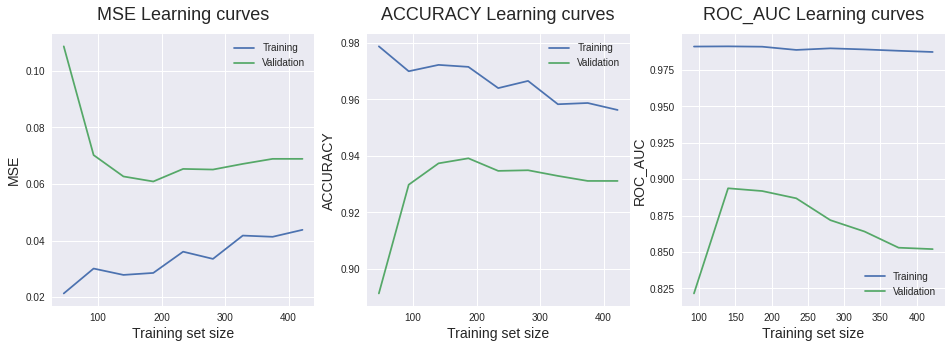

mACC:0.933
mAUC:0.863
<----------------------------------->

5NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

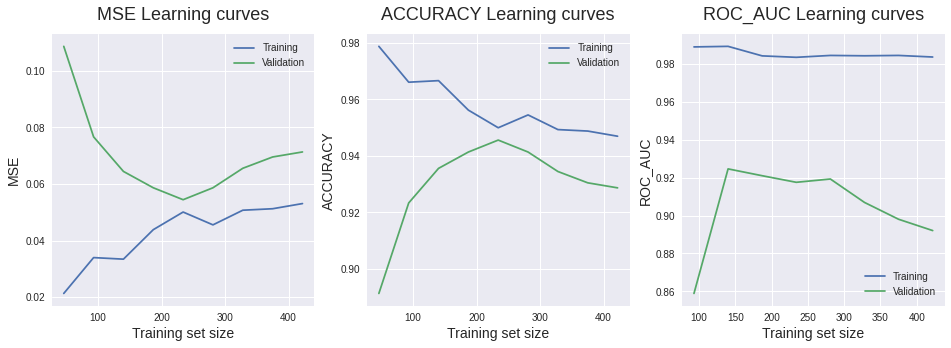

mACC:0.935
mAUC:0.908
<----------------------------------->

10NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

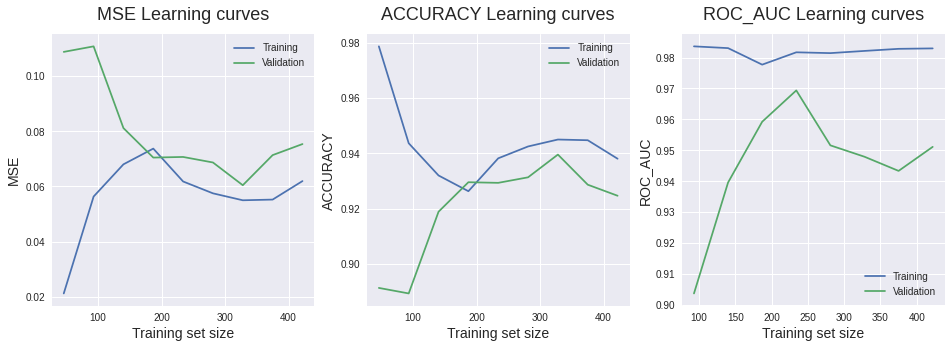

mACC:0.933
mAUC:0.948
<----------------------------------->

LogisticRegression


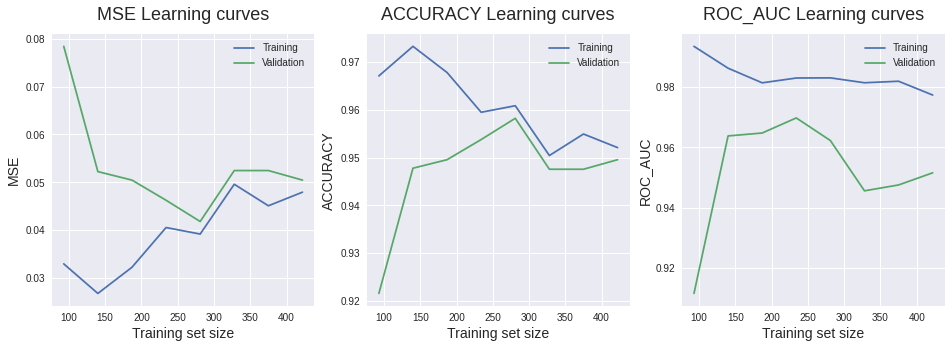

mACC:0.951
mAUC:0.952
<----------------------------------->



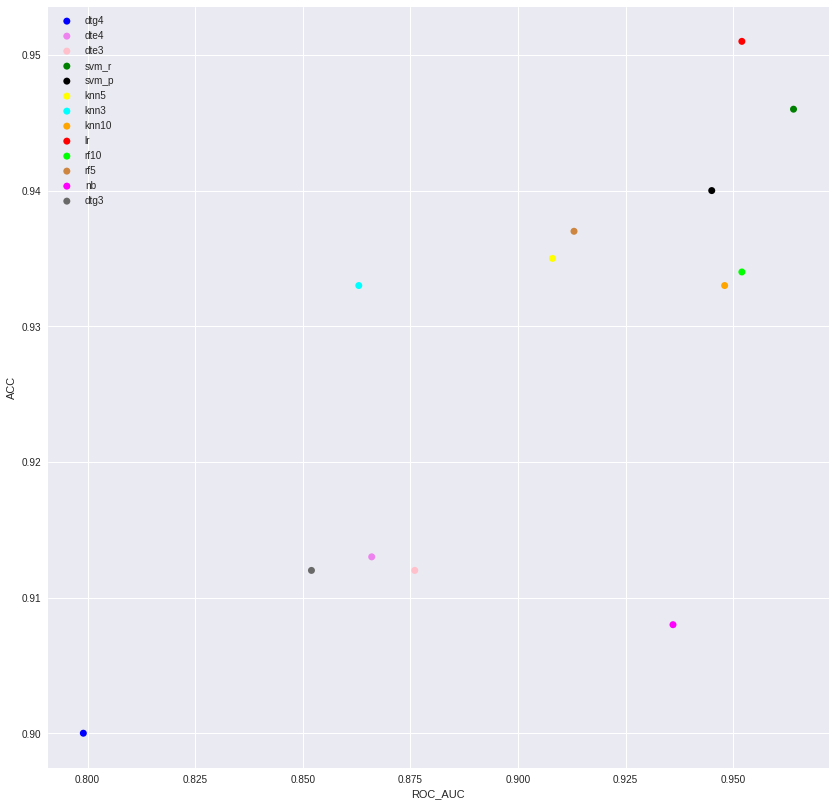

In [108]:
performance_comparer(X_t, y)

Vamos a utilizar las tecnicas de reduccion de dimensiones 

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components=3)
X_pca_r = pca.fit_transform(X_t)
print('explained variance ratio (for components): %s'
                        %str(pca.explained_variance_ratio_))

explained variance ratio (for components): [0.46998507 0.2229531  0.14528338]


In [111]:
from Models.functions.data_set_plot import plot_2d_data, plot_3d_data


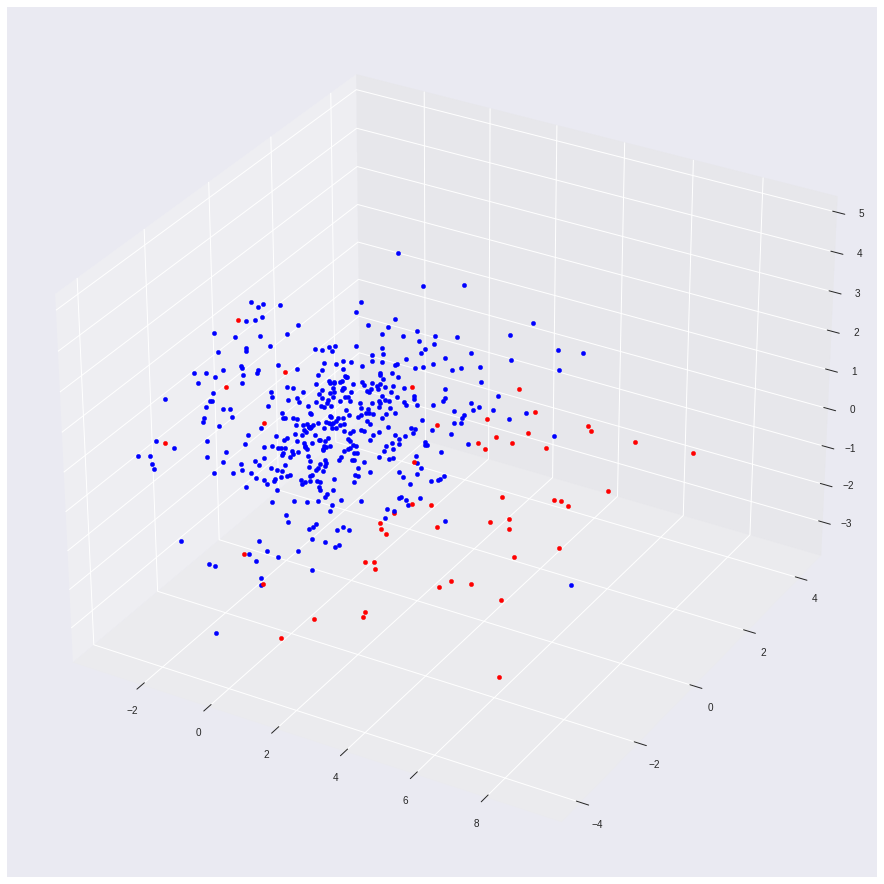

In [112]:
plot_3d_data(X_pca_r,y.to_numpy())

DecisionTree Gini depth=4


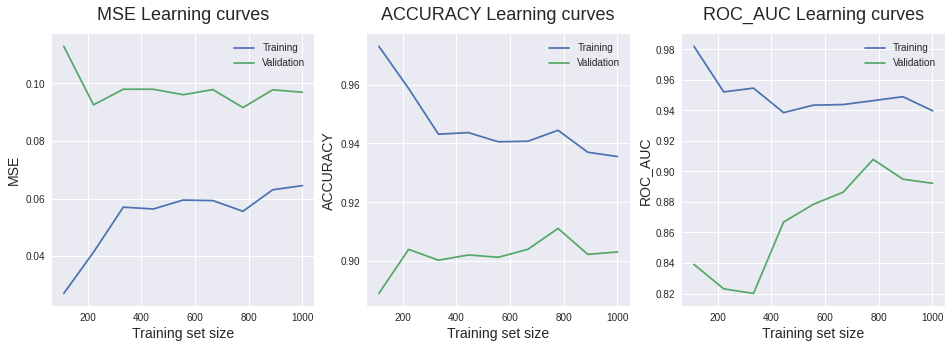

mACC:0.906
mAUC:0.896
<----------------------------------->

DecisionTree Entropy depth=4


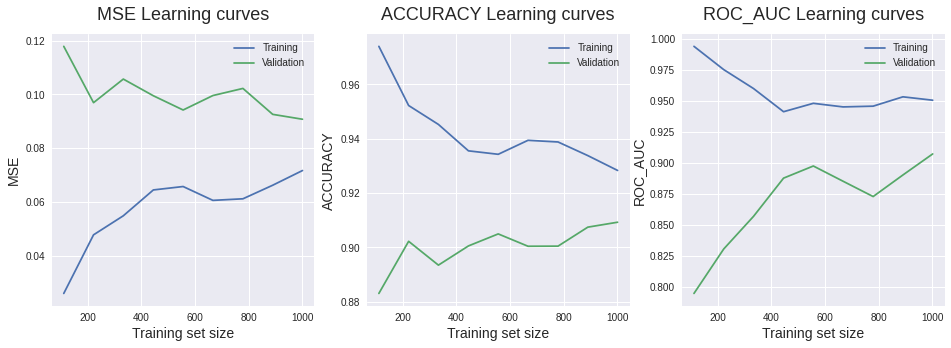

mACC:0.903
mAUC:0.883
<----------------------------------->

DecisionTree Gini depth=3


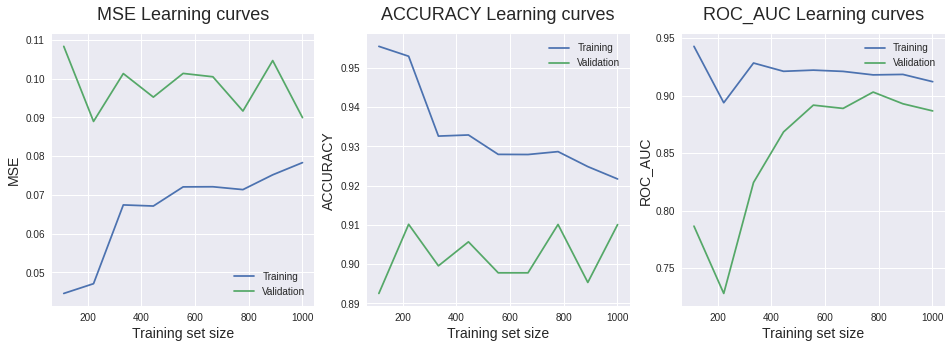

mACC:0.906
mAUC:0.896
<----------------------------------->

DecisionTree Entropy depth=3


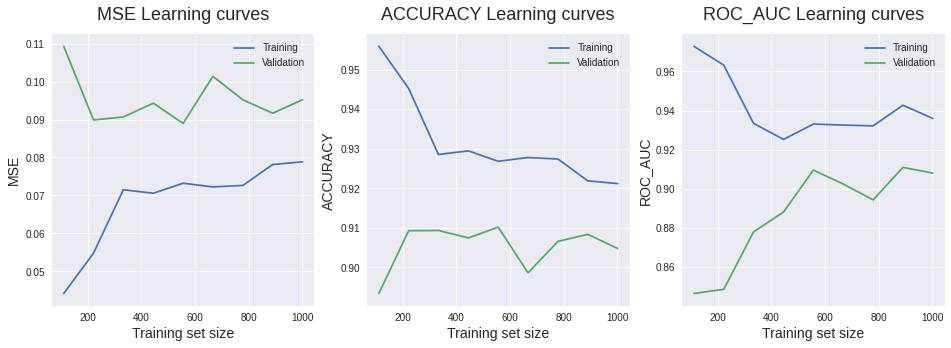

mACC:0.903
mAUC:0.883
<----------------------------------->

SVM kernel=poly


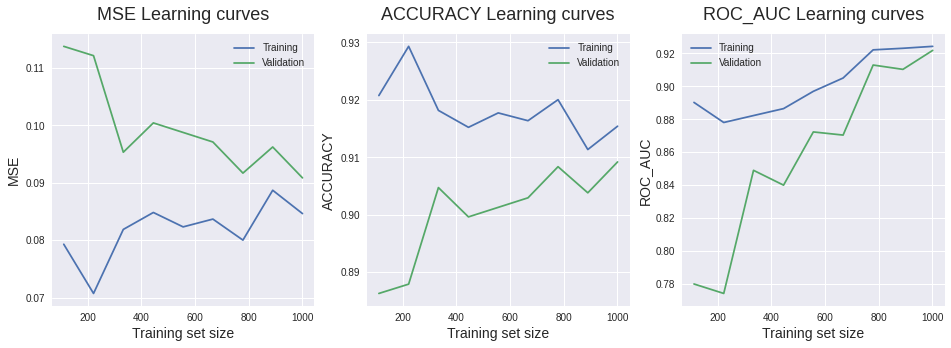

mACC:0.905
mAUC:0.898
<----------------------------------->

SVM kernel=rbf


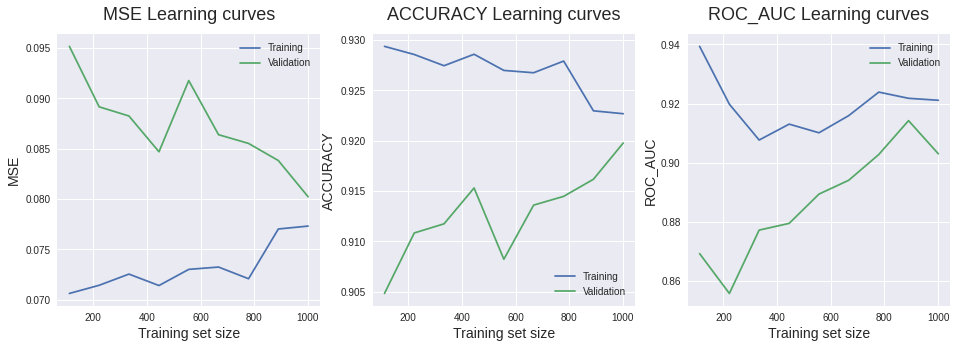

mACC:0.915
mAUC:0.904
<----------------------------------->

Random Forest estimators=10


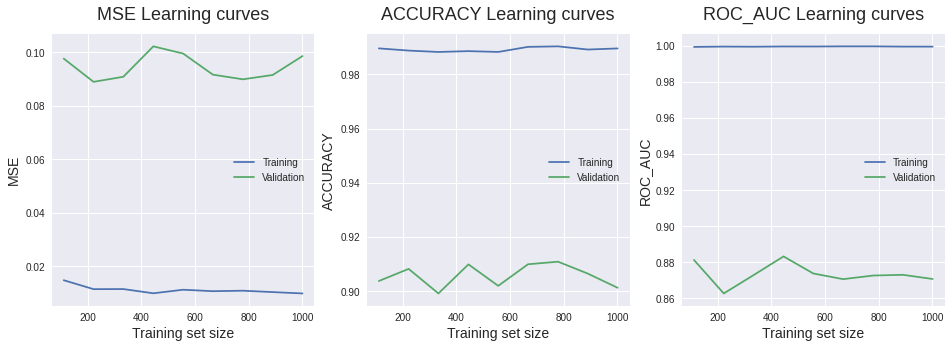

mACC:0.909
mAUC:0.872
<----------------------------------->

Random Forest estimators=5


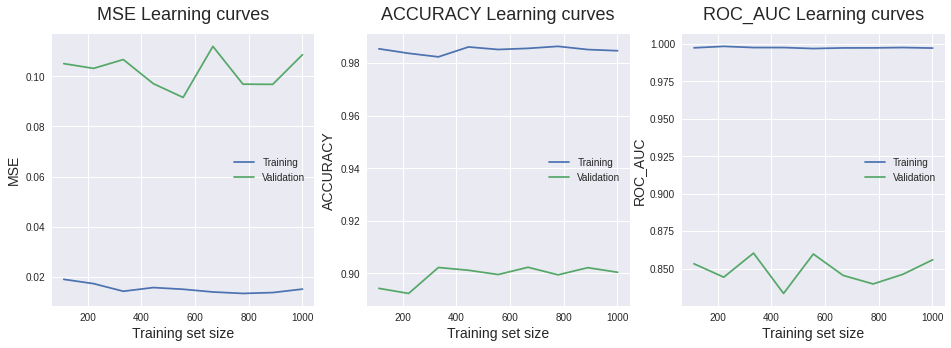

mACC:0.901
mAUC:0.844
<----------------------------------->

Naive Bayes


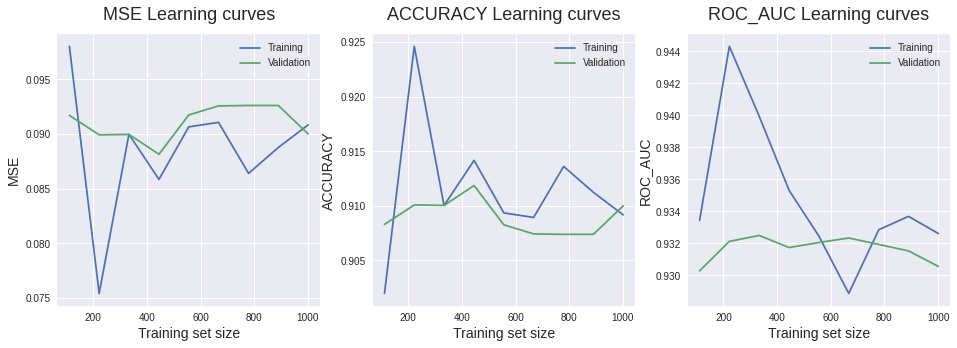

mACC:0.907
mAUC:0.932
<----------------------------------->

3NN


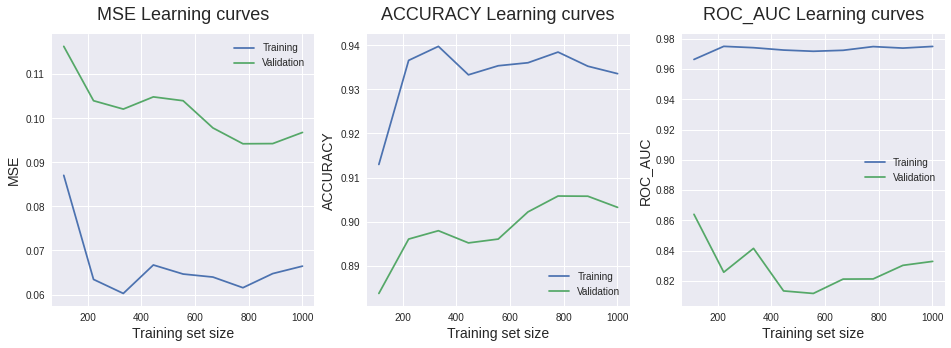

mACC:0.905
mAUC:0.824
<----------------------------------->

5NN


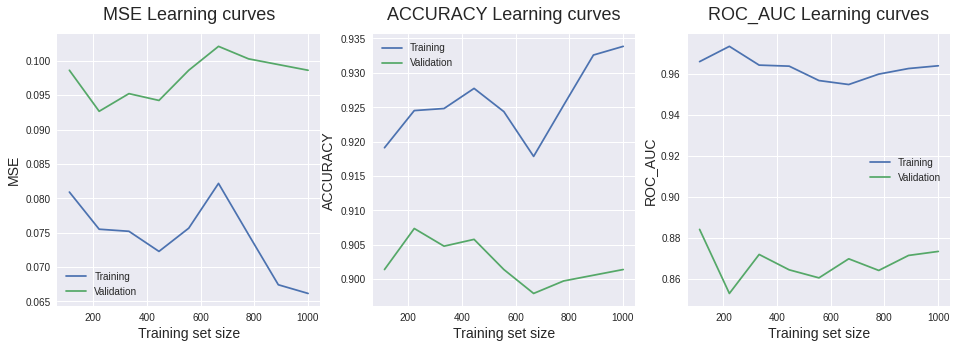

mACC:0.899
mAUC:0.869
<----------------------------------->

10NN


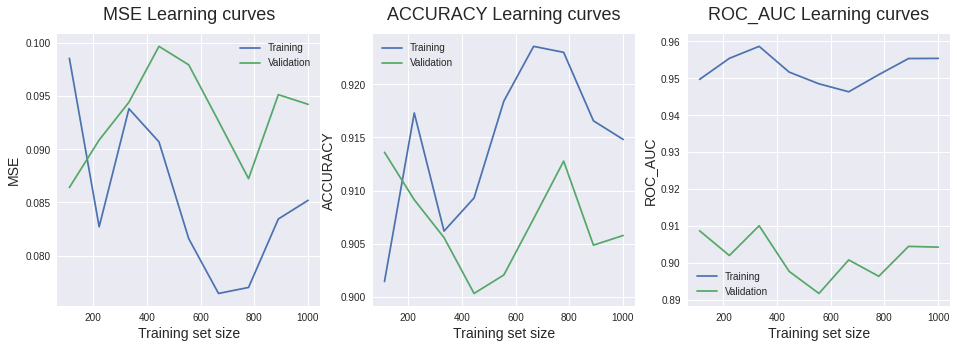

mACC:0.908
mAUC:0.9
<----------------------------------->

LogisticRegression


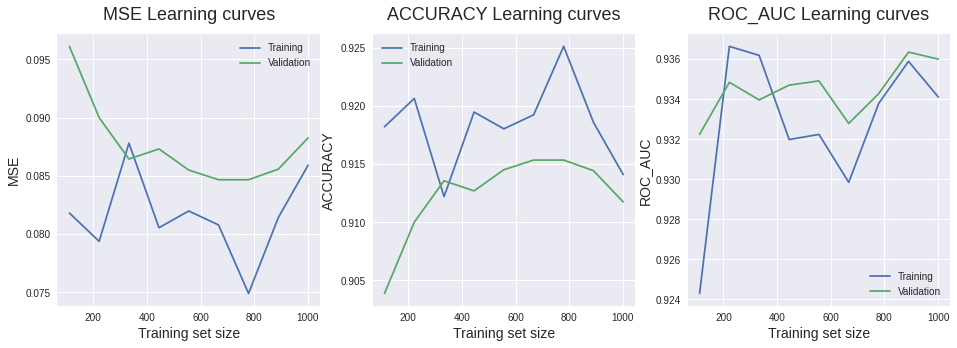

mACC:0.915
mAUC:0.934
<----------------------------------->



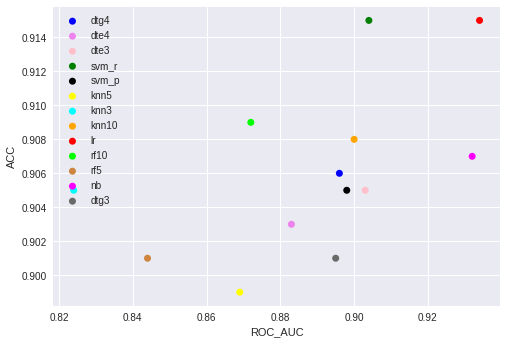

In [46]:
performance_comparer(X_pca_r, y)

In [113]:
from sklearn.decomposition import KernelPCA

In [114]:
kpca = KernelPCA(n_components=3, kernel='poly')
X_kpca_r = kpca.fit_transform(X_t)

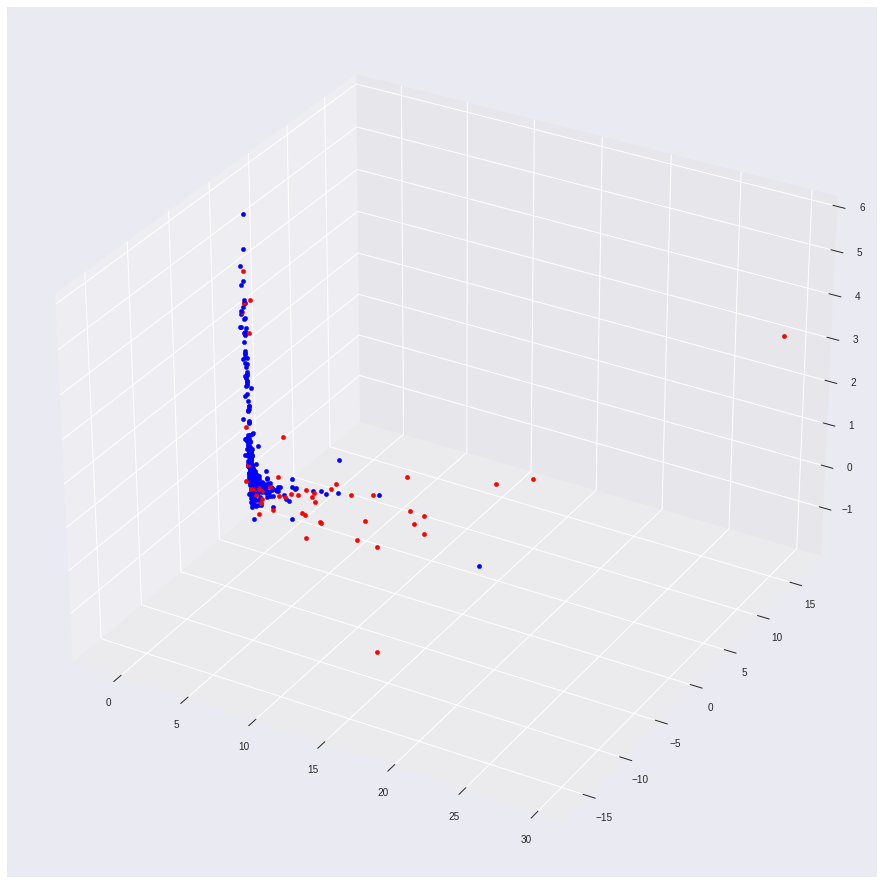

In [115]:
plot_3d_data(X_kpca_r,y.to_numpy())

DecisionTree Gini depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

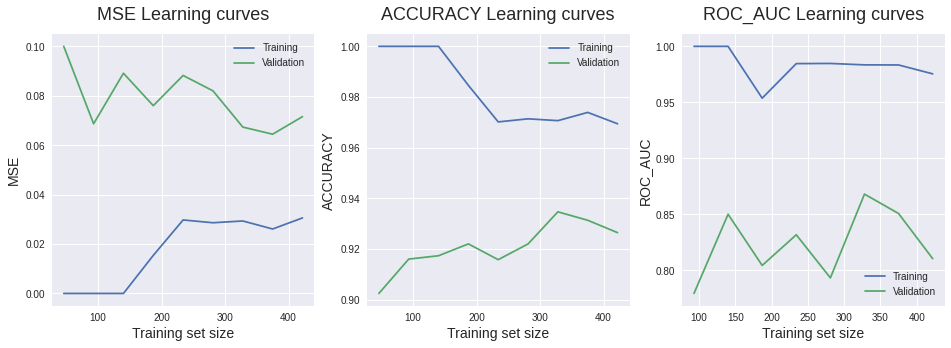

mACC:0.929
mAUC:0.837
<----------------------------------->

DecisionTree Entropy depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

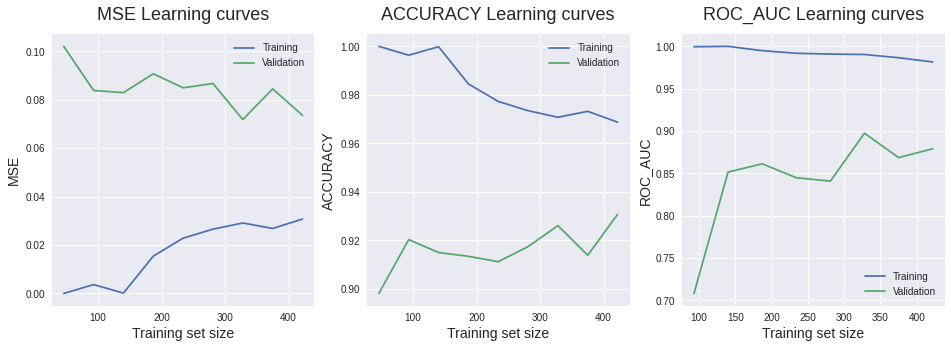

mACC:0.919
mAUC:0.869
<----------------------------------->

DecisionTree Gini depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

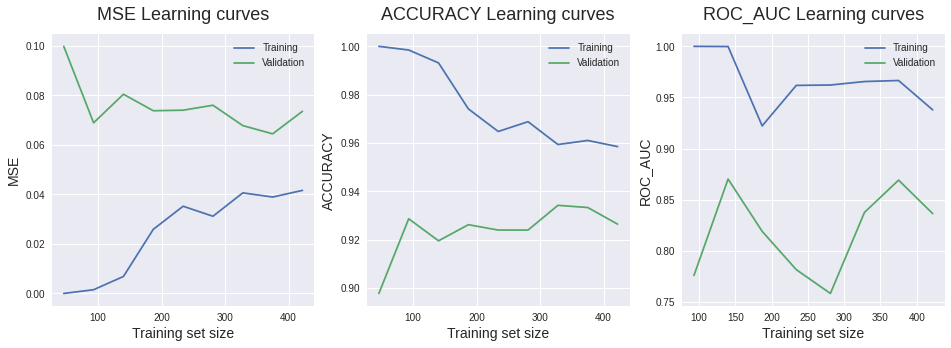

mACC:0.929
mAUC:0.837
<----------------------------------->

DecisionTree Entropy depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

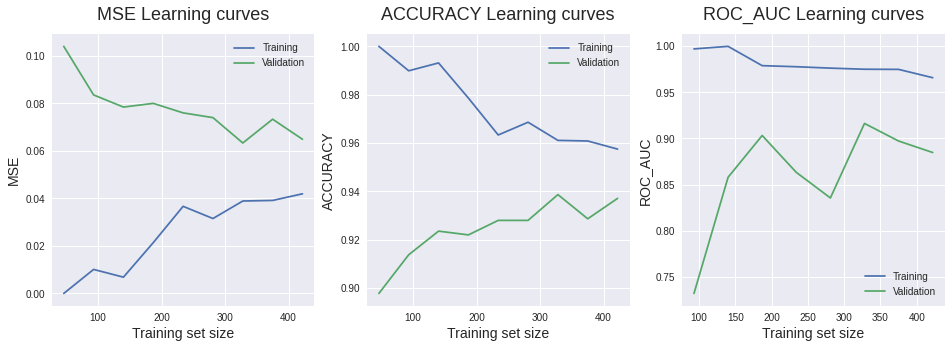

mACC:0.919
mAUC:0.869
<----------------------------------->

SVM kernel=poly


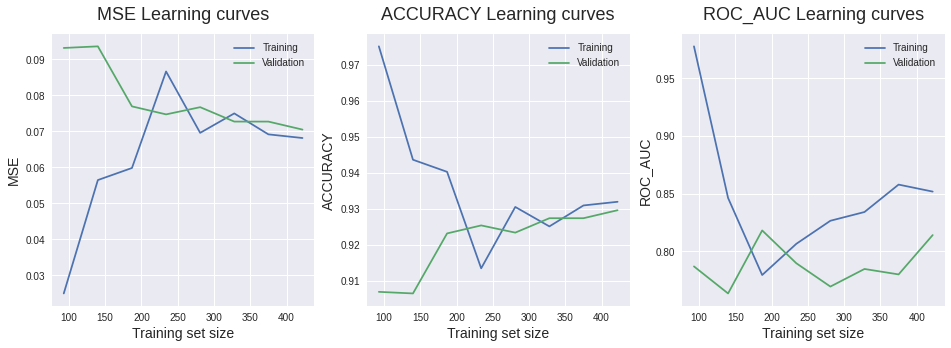

mACC:0.926
mAUC:0.778
<----------------------------------->

SVM kernel=rbf


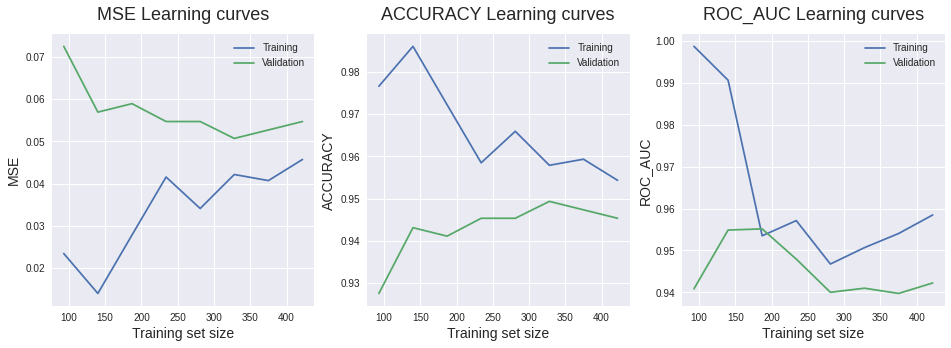

mACC:0.947
mAUC:0.94
<----------------------------------->

Random Forest estimators=10


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

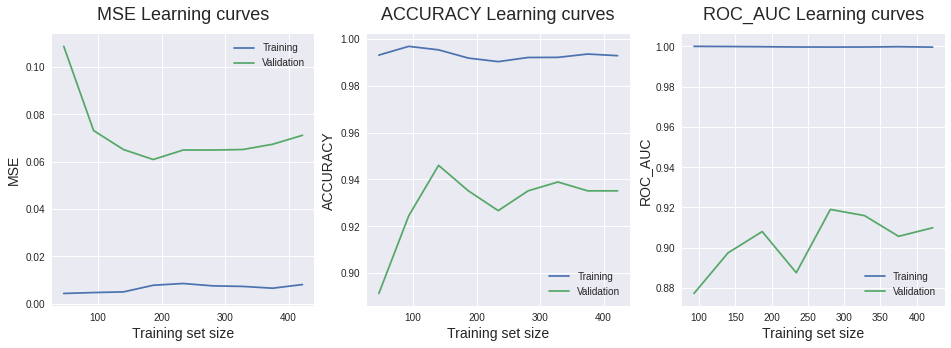

mACC:0.936
mAUC:0.914
<----------------------------------->

Random Forest estimators=5


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

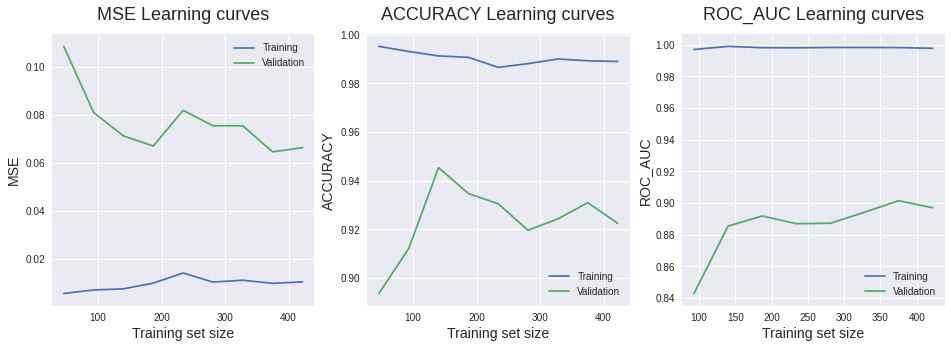

mACC:0.925
mAUC:0.894
<----------------------------------->

Naive Bayes


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_sco

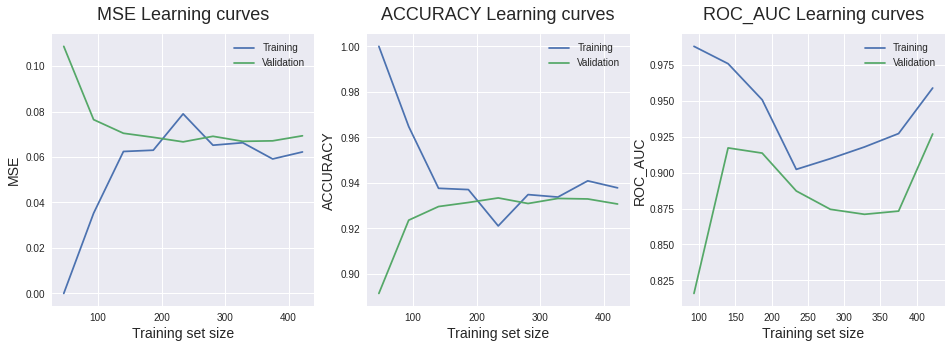

mACC:0.932
mAUC:0.873
<----------------------------------->

3NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

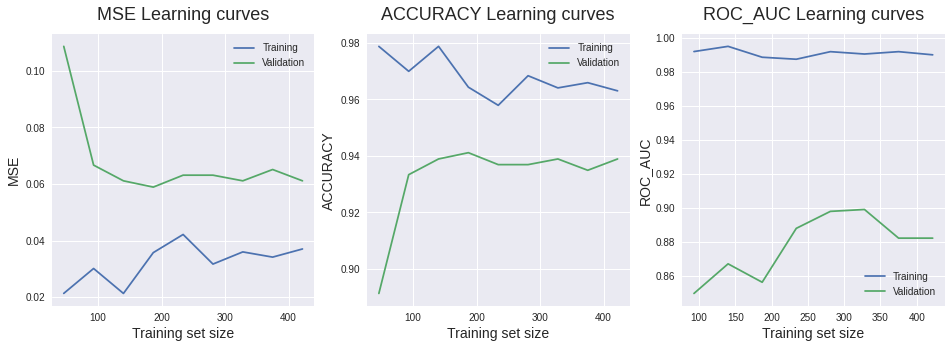

mACC:0.937
mAUC:0.893
<----------------------------------->

5NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

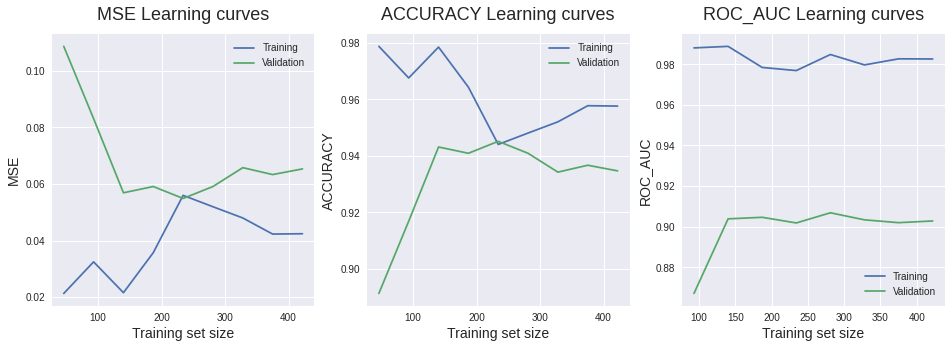

mACC:0.937
mAUC:0.904
<----------------------------------->

10NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

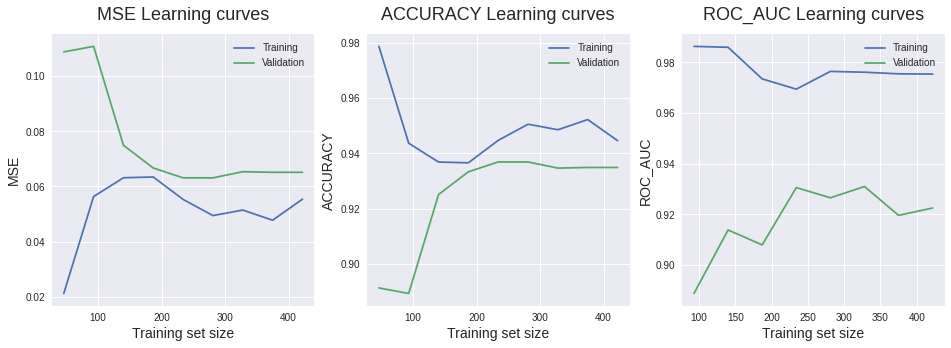

mACC:0.935
mAUC:0.926
<----------------------------------->

LogisticRegression


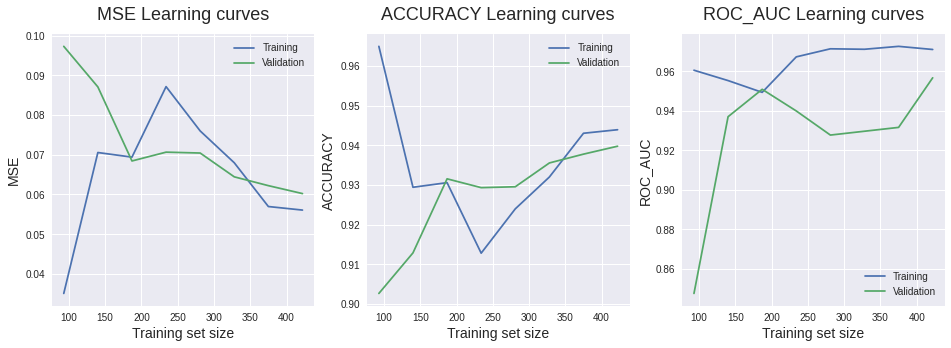

mACC:0.934
mAUC:0.93
<----------------------------------->



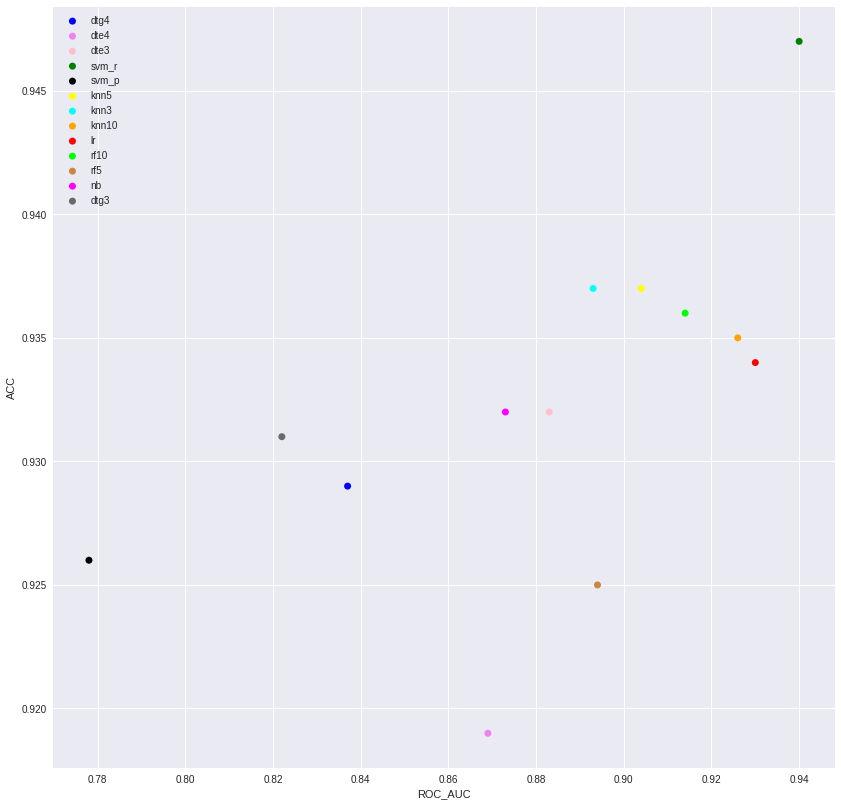

In [116]:
performance_comparer(X_kpca_r,y)

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [118]:
lda = LinearDiscriminantAnalysis()
X_lda_r = lda.fit_transform(X_t, y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTree Gini depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

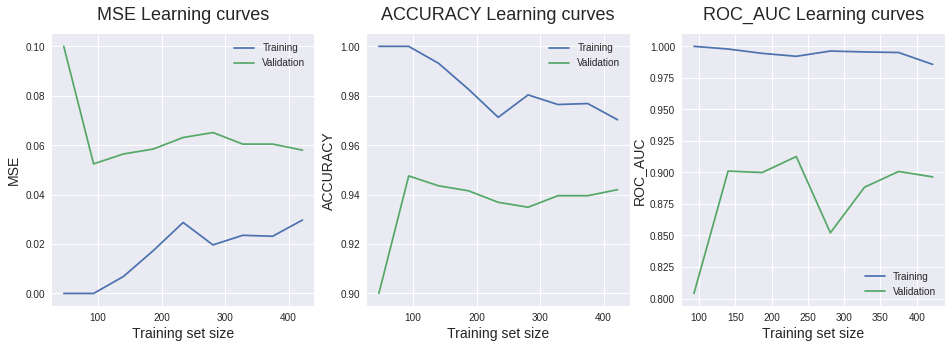

mACC:0.938
mAUC:0.88
<----------------------------------->

DecisionTree Entropy depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

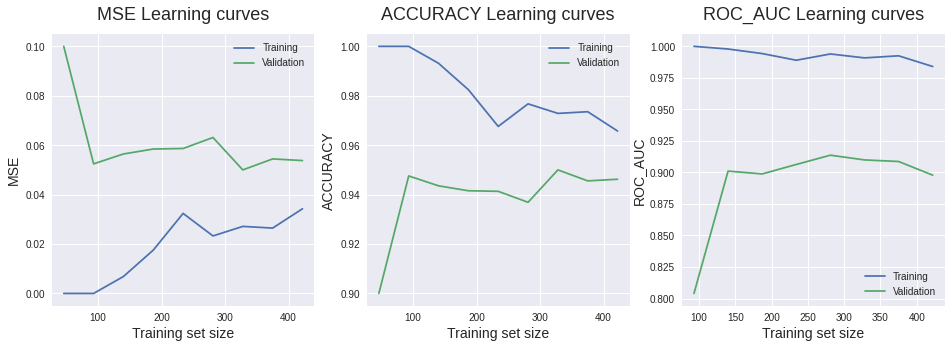

mACC:0.944
mAUC:0.911
<----------------------------------->

DecisionTree Gini depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

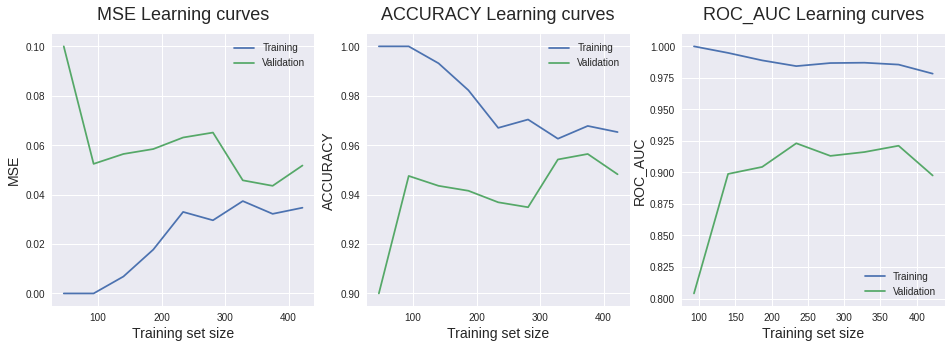

mACC:0.938
mAUC:0.88
<----------------------------------->

DecisionTree Entropy depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

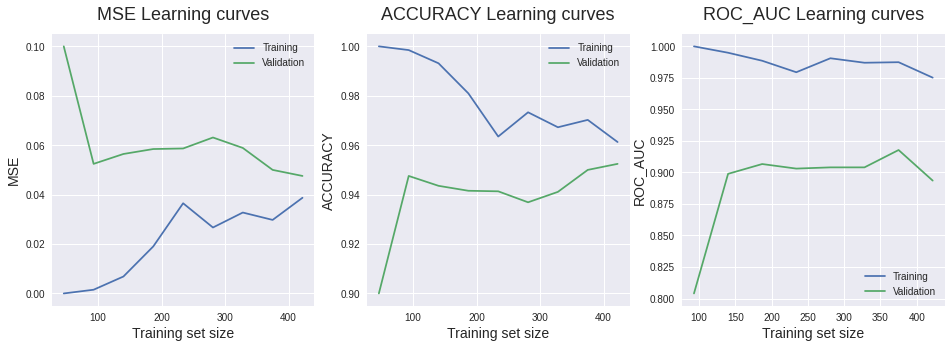

mACC:0.944
mAUC:0.911
<----------------------------------->

SVM kernel=poly


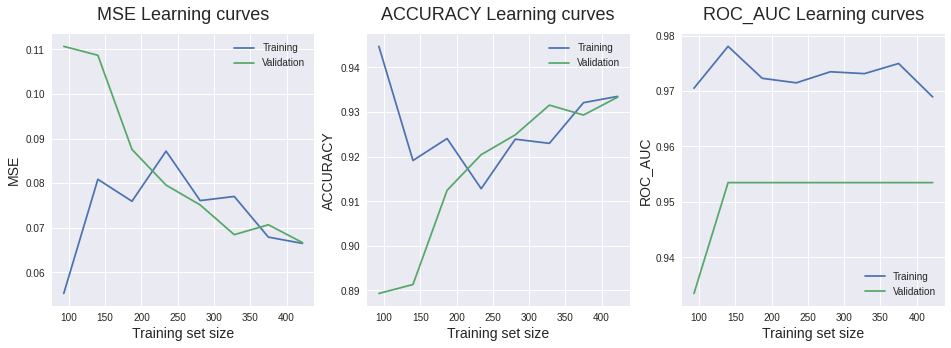

mACC:0.929
mAUC:0.953
<----------------------------------->

SVM kernel=rbf


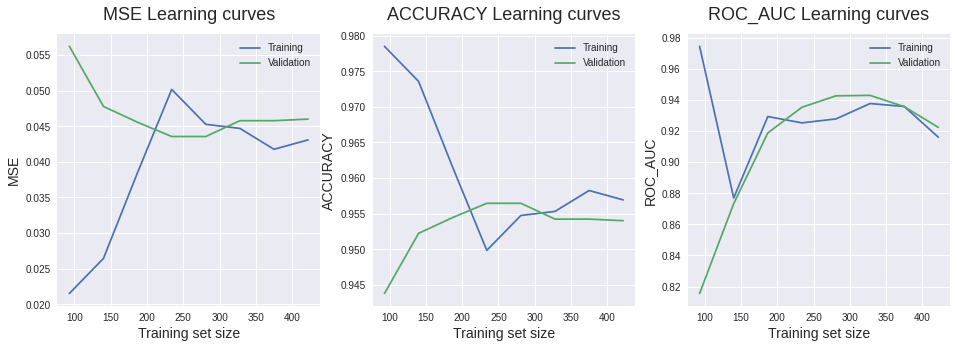

mACC:0.955
mAUC:0.94
<----------------------------------->

Random Forest estimators=10


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

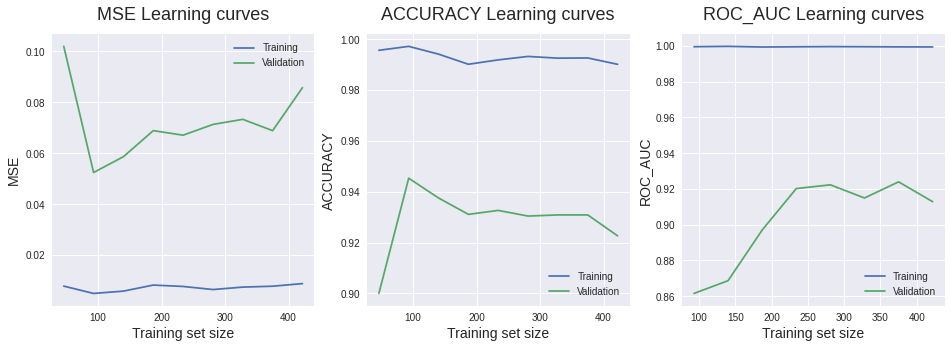

mACC:0.931
mAUC:0.92
<----------------------------------->

Random Forest estimators=5


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

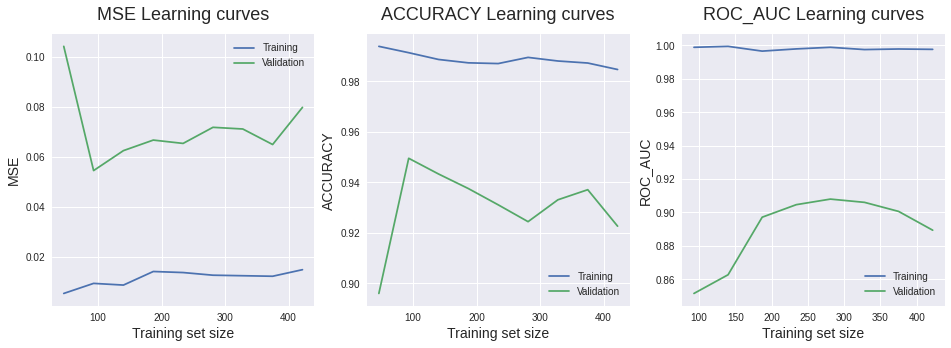

mACC:0.932
mAUC:0.905
<----------------------------------->

Naive Bayes


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_sco

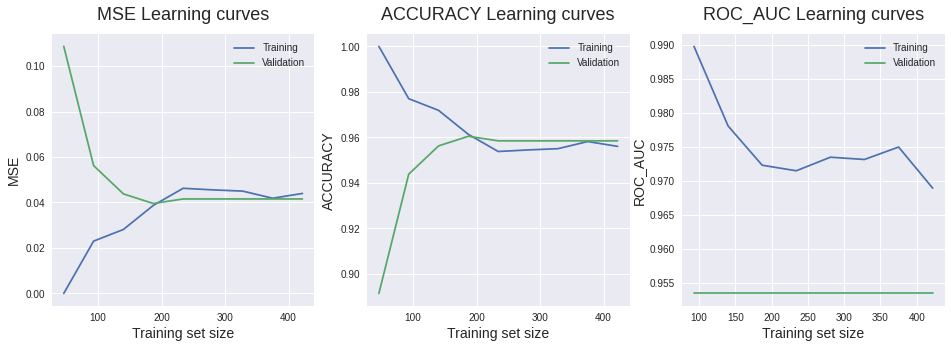

mACC:0.958
mAUC:0.953
<----------------------------------->

3NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

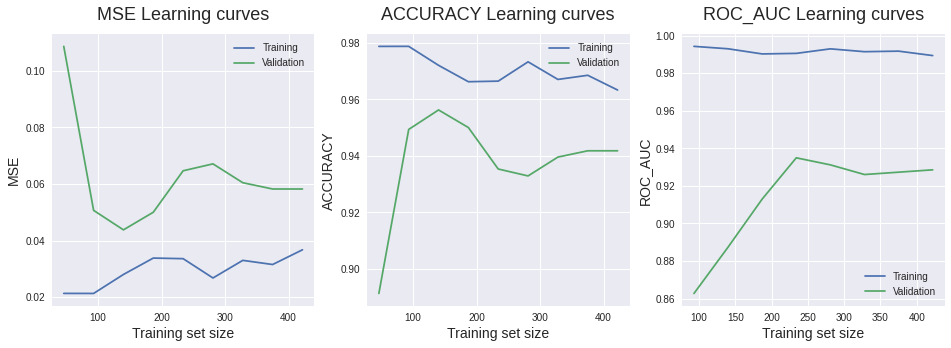

mACC:0.938
mAUC:0.928
<----------------------------------->

5NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

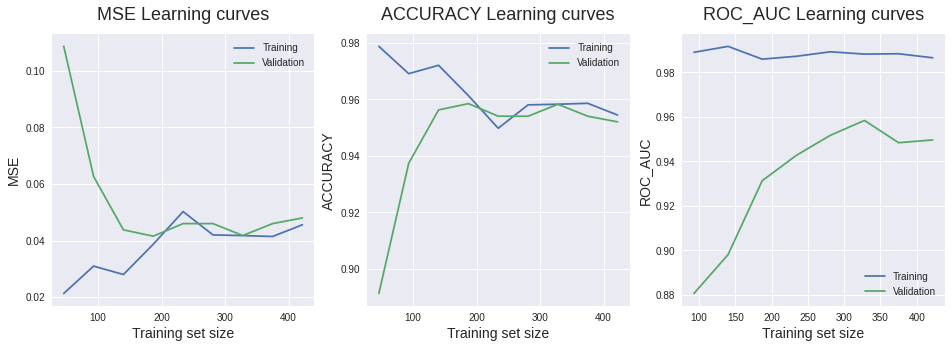

mACC:0.955
mAUC:0.953
<----------------------------------->

10NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

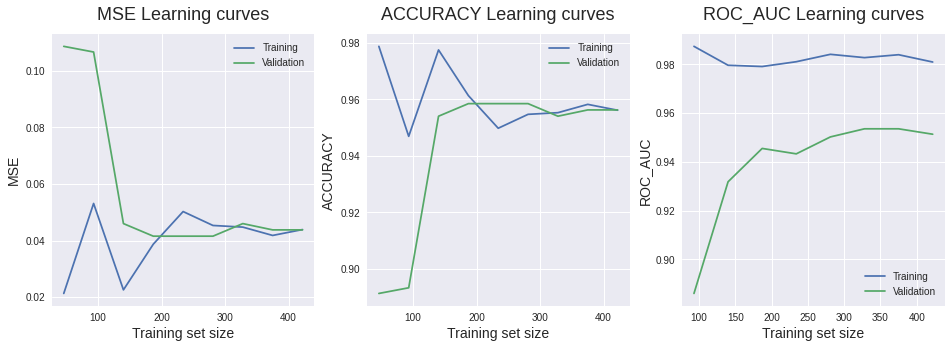

mACC:0.956
mAUC:0.952
<----------------------------------->

LogisticRegression


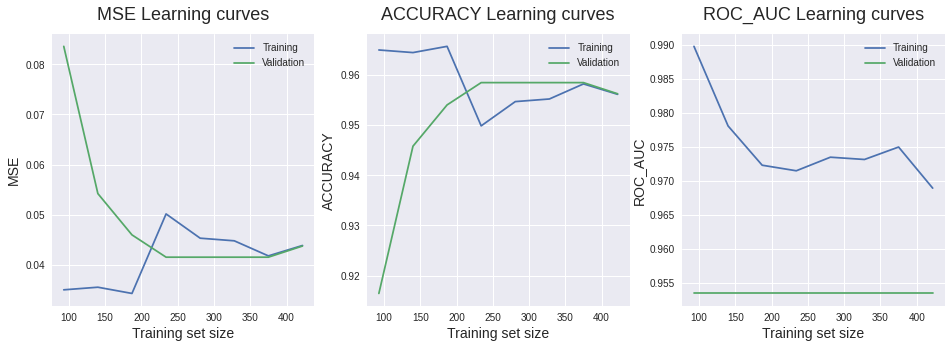

mACC:0.958
mAUC:0.953
<----------------------------------->



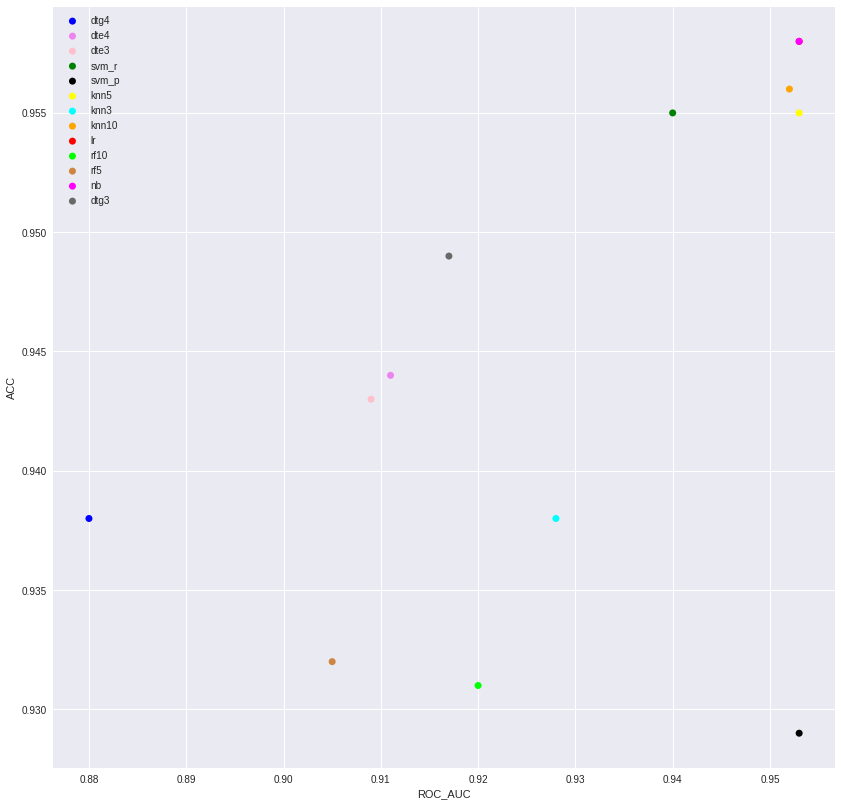

In [119]:
performance_comparer(X_lda_r, y)

In [120]:
pca = PCA()
# perform PCA on the scaled data
pca.fit(X_t)

PCA()

In [121]:

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[4.69985065e+01 2.22953105e+01 1.45283385e+01 5.79423440e+00
 4.28728161e+00 2.18750810e+00 1.75608622e+00 1.27482290e+00
 8.50131457e-01 2.77798607e-02]



In [122]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 46.99850651  69.29381699  83.82215545  89.61638986  93.90367146
  96.09117956  97.84726578  99.12208868  99.97222014 100.        ]



Text(0, 0.5, 'Explained variance (%)')

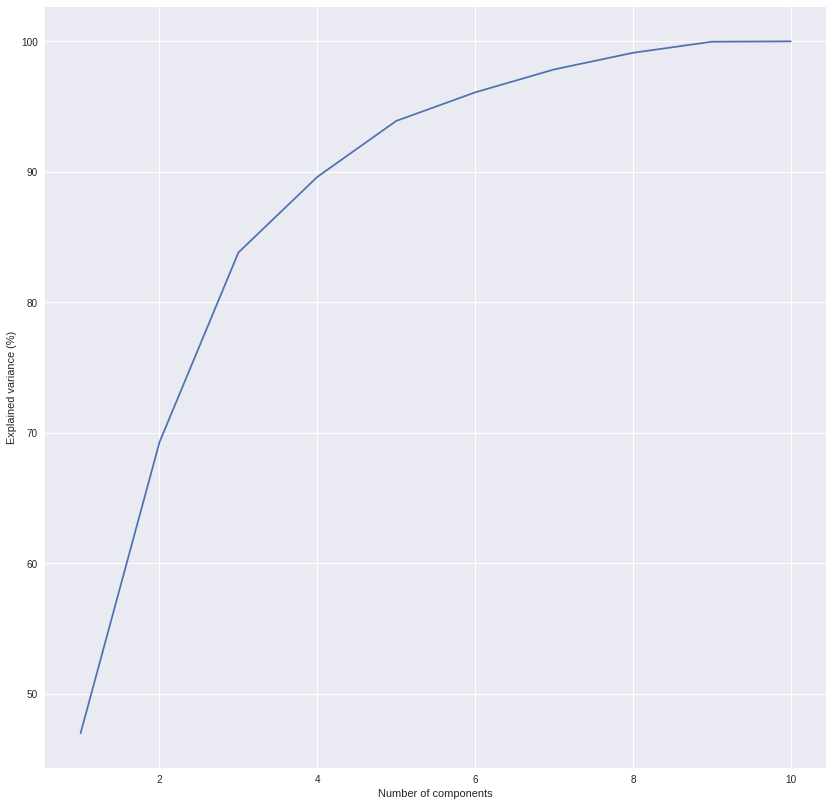

In [123]:
# plot a scree plot
components = None
components = len(pca.explained_variance_ratio_) if components is None else components
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[46.99850651 69.29381699 83.82215545 89.61638986 93.90367146]
Number of components: 5


Text(0, 0.5, 'Explained variance (%)')

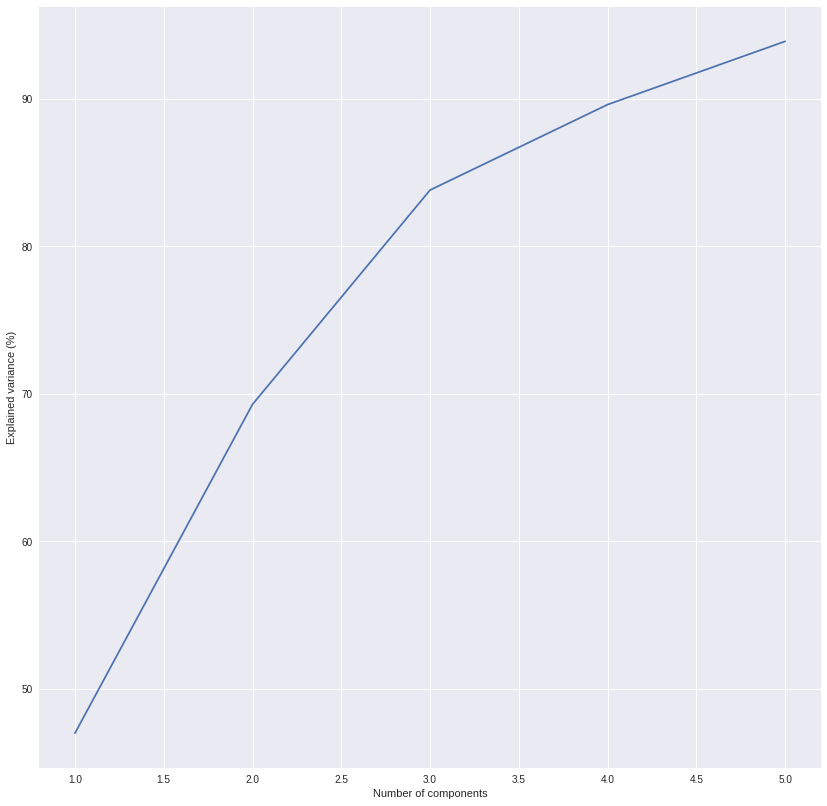

In [124]:
pca = PCA(n_components = 0.9)
pca.fit(X_t)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [125]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.35651873 0.40369138 0.10754168 0.11357403 0.38828042 0.40947132
  0.17426996 0.16078524 0.41120325 0.37646369]
 [0.0333475  0.1424559  0.5681314  0.59145022 0.20818618 0.27023706
  0.20531445 0.27093361 0.2649623  0.06224137]
 [0.43843195 0.09012328 0.05236549 0.0236413  0.02161088 0.04164013
  0.67857571 0.48791042 0.03850332 0.30683736]
 [0.20058401 0.01204691 0.28105646 0.20031493 0.00713018 0.04973658
  0.24226629 0.78942305 0.06936412 0.38895305]
 [0.13119471 0.15801084 0.55666263 0.49750467 0.495533   0.24956523
  0.09684459 0.0057353  0.18681695 0.21974587]]


In [127]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['R_pt', 'ER_pt', 'WAR_pt', 'BB_pt']
Component 1: ['ERA_pt', 'WHIP_pt', 'W-L%_pt', 'ER_pt']
Component 2: ['G_pt', 'W-L%_pt', 'total_seasons', 'SHO_pt']
Component 3: ['W-L%_pt', 'SHO_pt', 'WHIP_pt', 'G_pt']
Component 4: ['WHIP_pt', 'ERA_pt', 'BB_pt', 'ER_pt']


In [128]:
X_pca = pca.transform(X_t)
print(X_pca.shape)
print(X_pca)

(479, 5)
[[-0.33880682 -0.24126857 -1.81468409  1.73350495  0.1444918 ]
 [-1.37952942  2.73096665 -1.26353491  1.07657942  0.35751877]
 [-1.58455233 -1.57781079  0.56682762 -0.36116523 -0.04740593]
 ...
 [-0.57797053  1.23543109  0.14217189  0.68587316 -1.01037427]
 [-1.3149897   0.60307536 -0.59685144 -0.58187271  0.11818874]
 [ 1.71171989  1.87122538  0.88687952 -0.11239699  0.42690753]]


DecisionTree Gini depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

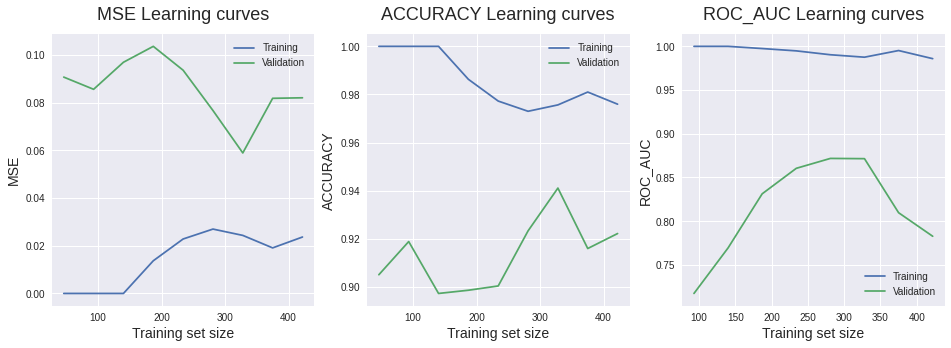

mACC:0.927
mAUC:0.851
<----------------------------------->

DecisionTree Entropy depth=4


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

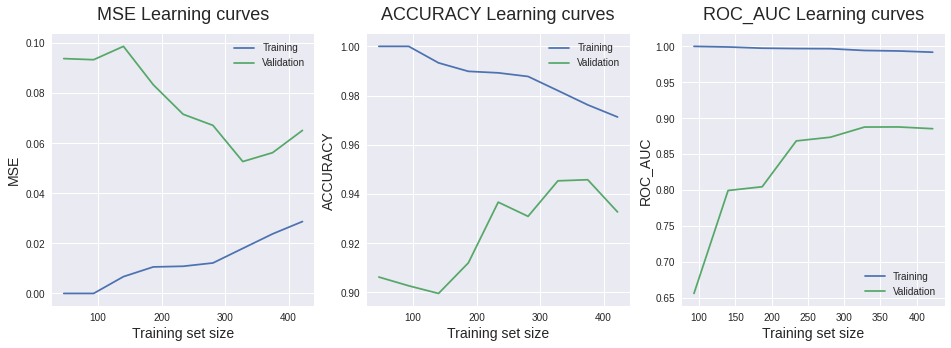

mACC:0.941
mAUC:0.883
<----------------------------------->

DecisionTree Gini depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

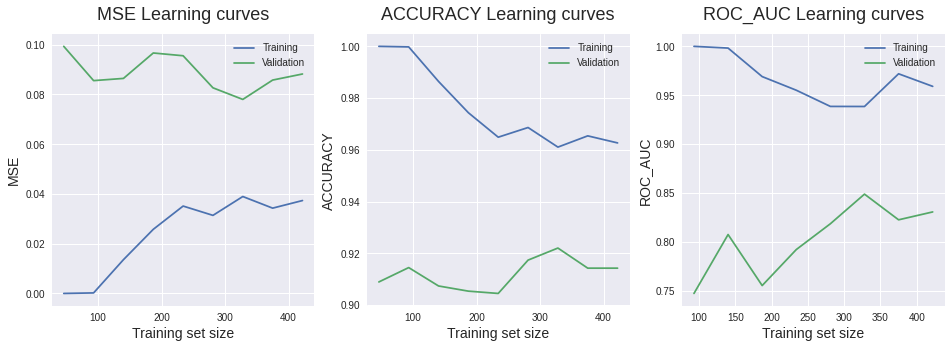

mACC:0.927
mAUC:0.851
<----------------------------------->

DecisionTree Entropy depth=3


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

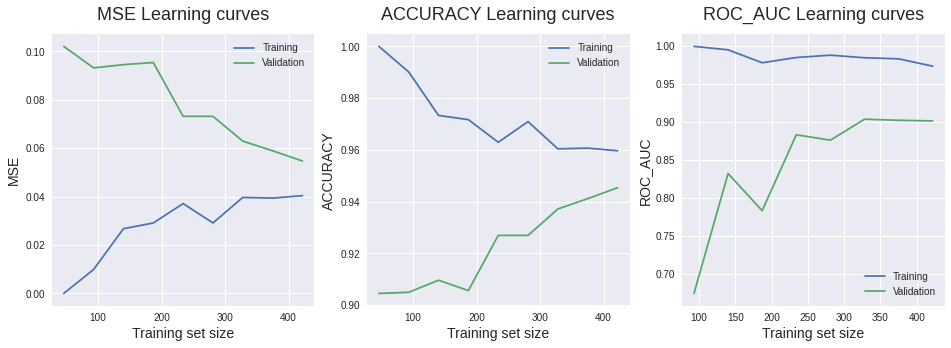

mACC:0.941
mAUC:0.883
<----------------------------------->

SVM kernel=poly


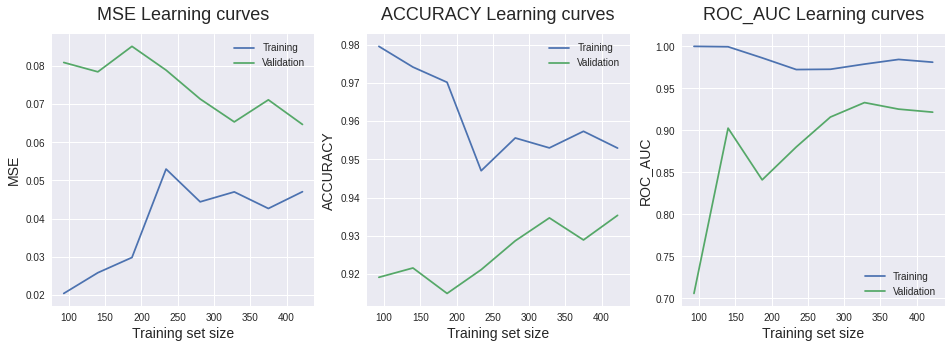

mACC:0.931
mAUC:0.925
<----------------------------------->

SVM kernel=rbf


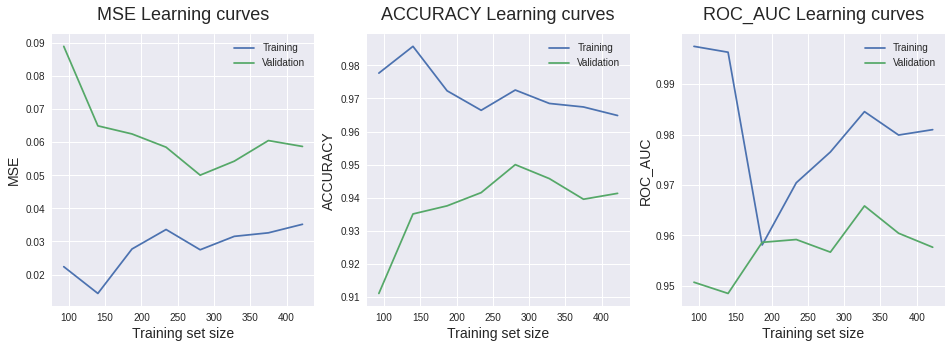

mACC:0.945
mAUC:0.961
<----------------------------------->

Random Forest estimators=10


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

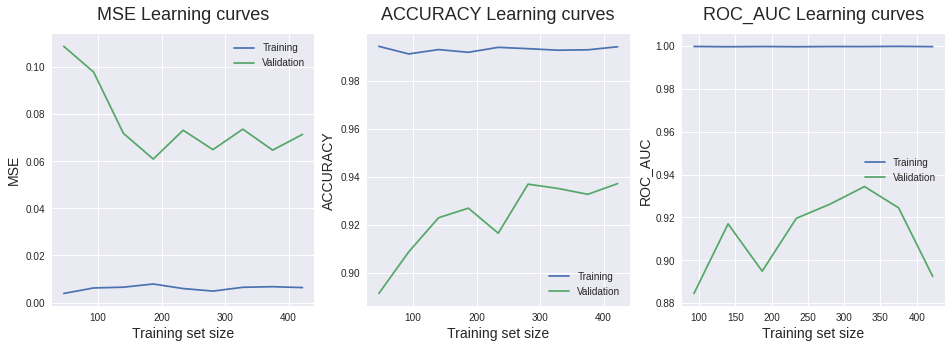

mACC:0.935
mAUC:0.928
<----------------------------------->

Random Forest estimators=5


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/

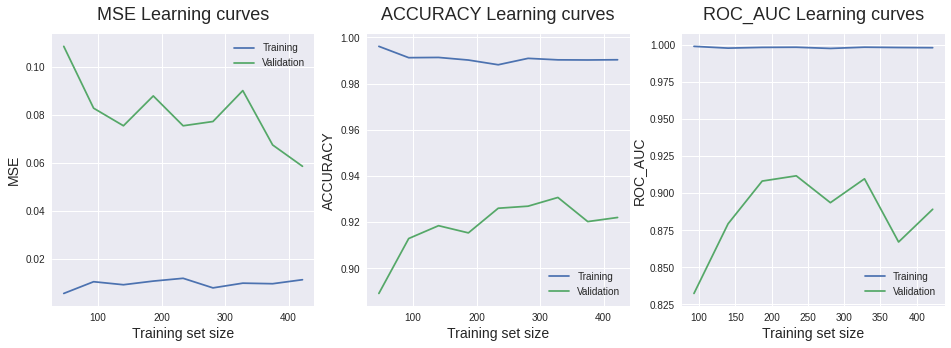

mACC:0.926
mAUC:0.89
<----------------------------------->

Naive Bayes


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_sco

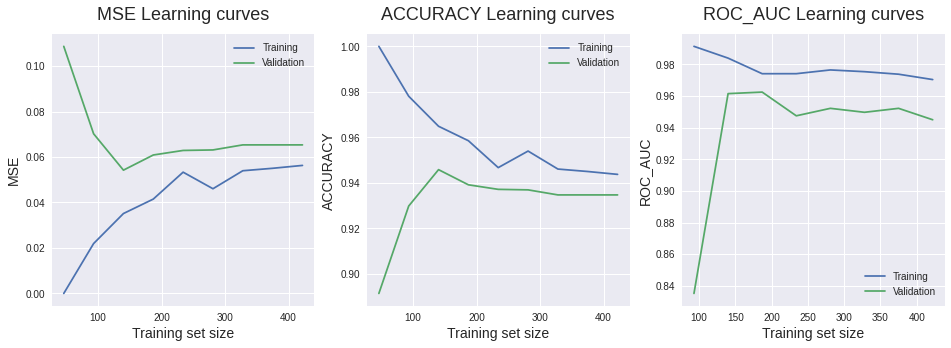

mACC:0.935
mAUC:0.951
<----------------------------------->

3NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

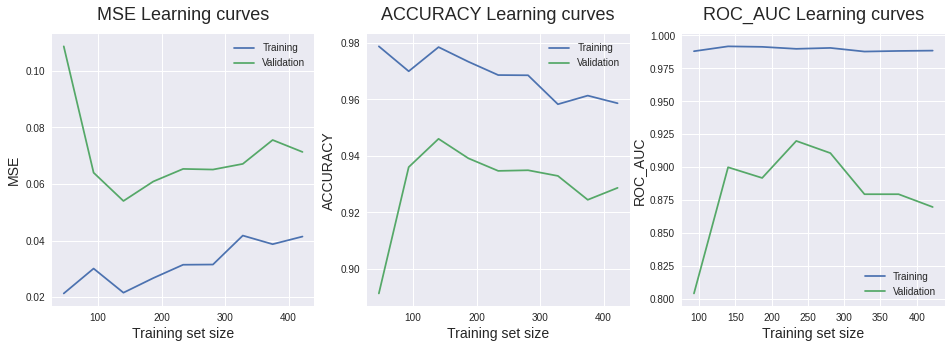

mACC:0.931
mAUC:0.89
<----------------------------------->

5NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

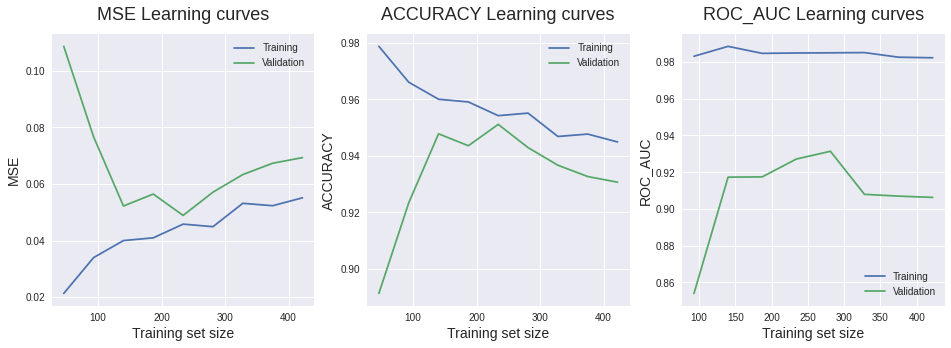

mACC:0.937
mAUC:0.915
<----------------------------------->

10NN


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/me

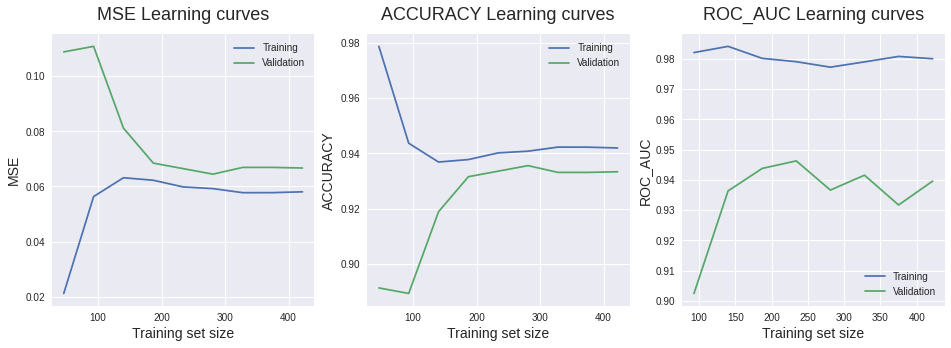

mACC:0.934
mAUC:0.937
<----------------------------------->

LogisticRegression


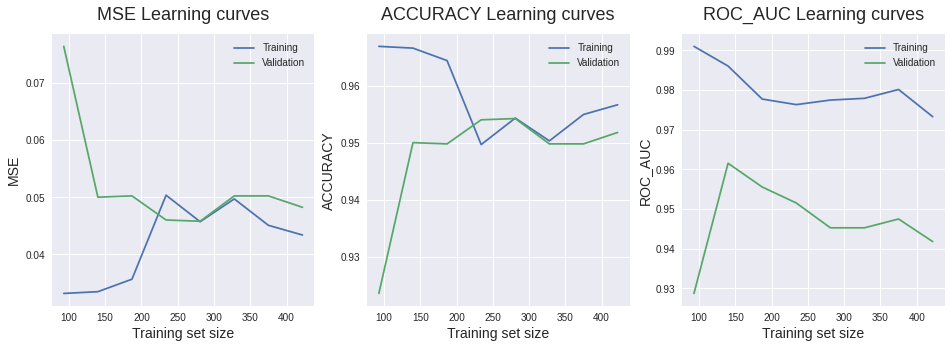

mACC:0.951
mAUC:0.946
<----------------------------------->



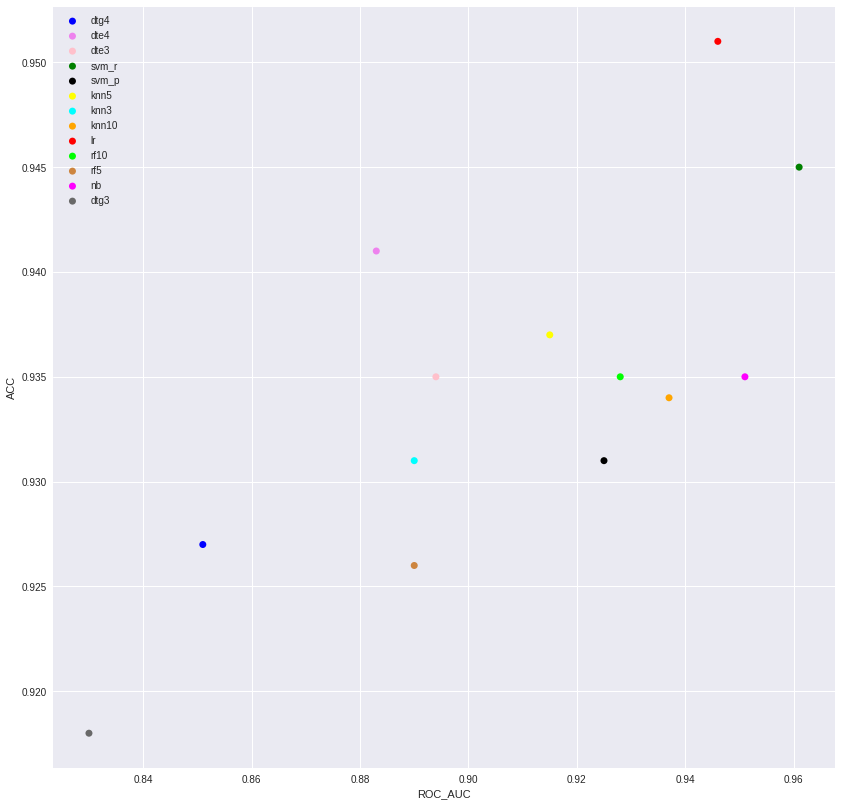

In [129]:
performance_comparer(X_pca,y)

In [130]:
from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LogisticRegression

_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# perform a split
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.3,shuffle=True, random_state=567)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('regressor', LogisticRegression())])

In [133]:
log_regress_model.score(X_test,y_test)

0.9305555555555556

In [135]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
test_gt_condition = {
    'WAR_pt':15,
    "total_seasons":10,
    'retirament_decade':2010
}

test_df = filter_dataset(inactive_pit_df, mayor_league_condition, test_gt_condition, None, None)

In [136]:
test_df.shape

(85, 60)

In [137]:
X_unused_test = test_df[reduced_features]
y_unused_test = test_df["HoF"]

In [138]:
y_unused_test.value_counts()

0    82
1     3
Name: HoF, dtype: int64

In [139]:
log_regress_model.score(X_unused_test, y_unused_test)

0.9764705882352941

In [140]:
y_unused_test.iloc[0]

0

In [141]:
def compute_prediction_test(model,X_unused_test, y_unused_test):
    computes = []
    for i in range(len(X_unused_test)):
        p_pred = model.predict_proba(X_unused_test.iloc[i].to_numpy().reshape(1,-1))
        hof = y_unused_test.iloc[i]
        computes.append((test_df.iloc[i]['Name'],round(p_pred[0][1],3),hof))
    return computes
        #print(f"{test_df.iloc[i]['Name']} ---->  HOF_proba: {round(p_pred[0][1],3)} <----- real Hof status:{hof}")

In [142]:
results =  compute_prediction_test(log_regress_model, X_unused_test, y_unused_test)
results.sort(key= lambda x: x[1], reverse=True)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py

In [143]:
results

[('Mariano Rivera', 0.864, 1),
 ('Roy Halladay', 0.354, 1),
 ('Joe Nathan', 0.321, 0),
 ('Billy Wagner', 0.302, 0),
 ('CC Sabathia', 0.298, 0),
 ('Tim Hudson', 0.248, 0),
 ('Jamie Moyer', 0.191, 0),
 ('Andy Pettitte', 0.154, 0),
 ('Johan Santana', 0.122, 0),
 ('Jon Lester', 0.087, 0),
 ('Trevor Hoffman', 0.081, 1),
 ('Cole Hamels', 0.08, 0),
 ('Bartolo Colon', 0.079, 0),
 ('Francisco Rodriguez', 0.066, 0),
 ('Jonathan Papelbon', 0.065, 0),
 ('Mark Buehrle', 0.063, 0),
 ('Felix Hernandez', 0.056, 0),
 ('Roy Oswalt', 0.056, 0),
 ('Cliff Lee', 0.034, 0),
 ('Chris Carpenter', 0.025, 0),
 ('Arthur Rhodes', 0.02, 0),
 ('Jake Peavy', 0.018, 0),
 ('Jered Weaver', 0.018, 0),
 ('John Lackey', 0.017, 0),
 ('Tim Wakefield', 0.017, 0),
 ('Derek Lowe', 0.015, 0),
 ('Carlos Zambrano', 0.014, 0),
 ('Joaquin Benoit', 0.011, 0),
 ('A.J. Burnett', 0.009, 0),
 ('Josh Beckett', 0.009, 0),
 ('Octavio Dotel', 0.009, 0),
 ('Freddy Garcia', 0.009, 0),
 ('Dan Haren', 0.008, 0),
 ('Barry Zito', 0.008, 0),
 ('Gio